In [388]:
!mv /home/local/data/sophie/runs/good_logs.txt good_logs.txt 

In [389]:
!mv good_logs.txt /home/local/data/sophie/runs/good_logs.txt

In [10]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [41]:
runs_dir = "/home/local/data/sophie/runs"

In [44]:
good_runs = pd.read_table("/home/local/data/sophie/runs/good_logs.txt")

### Top-5

#### Top-5 F1

#### Top-5 F1 - Split by Training

In [380]:
top_f1_df = pd.DataFrame()
for run_name in good_runs.log_paths:
    curr_run = EventAccumulator(path=os.path.join(runs_dir,run_name))
    curr_run.Reload()
    join_df = pd.DataFrame()
    join_df['Step'] = [i.step for i in curr_run.Scalars("F1/test")]
    join_df['F1/Test'] = [i.value for i in curr_run.Scalars("F1/test")]

    join_df['F1/Ext1'] = [i.value for i in curr_run.Scalars("F1/ext1")]
    join_df['F1/Ext2'] = [i.value for i in curr_run.Scalars("F1/ext2")]
    join_df['F1/Ext3'] = [i.value for i in curr_run.Scalars("F1/ext3")]
    
    join_df['Model'] = run_name.strip("224_runs/")
    join_df['Image'] = run_name.split("/")[1]
    join_df['Training'] = run_name.split("/")[2]
    join_df['Backbone'] = run_name.split("/")[3]
    join_df['LR'] = run_name.split("/")[4].split("_")[1]
    join_df['Batch'] = run_name.split("/")[4].split("_")[3]
    join_df['Mom'] = run_name.split("/")[4].split("_")[5]
    top_f1_df = pd.concat([top_f1_df,join_df])

top_f1_df_nogrey = top_f1_df[top_f1_df['Backbone'] != "grey"].copy().reset_index(drop=True)
top_f1_df_nolung = top_f1_df[top_f1_df['Image'] != "lung_seg"].copy().reset_index(drop=True)


In [381]:
# top5_f1_fullnet_test_df = top_f1_df[top_f1_df['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext1_df = top_f1_df[top_f1_df['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext2_df = top_f1_df[top_f1_df['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext3_df = top_f1_df[top_f1_df['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()

# top5_f1_halfnet_test_df = top_f1_df[top_f1_df['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext1_df = top_f1_df[top_f1_df['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext2_df = top_f1_df[top_f1_df['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext3_df = top_f1_df[top_f1_df['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()

# top5_f1_fullnet_test_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext1_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext2_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext3_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()

# top5_f1_halfnet_test_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext1_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext2_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext3_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()

top5_f1_fullnet_test_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
top5_f1_fullnet_ext1_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
top5_f1_fullnet_ext2_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
top5_f1_fullnet_ext3_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()

top5_f1_halfnet_test_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
top5_f1_halfnet_ext1_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
top5_f1_halfnet_ext2_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
top5_f1_halfnet_ext3_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()


/tmp/ipykernel_451531/3452670452.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_f1_fullnet_test_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
/tmp/ipykernel_451531/3452670452.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_f1_fullnet_ext1_df = top_f1_df_nolung[top_f1_df_nolun

##### Top-5 Half Network

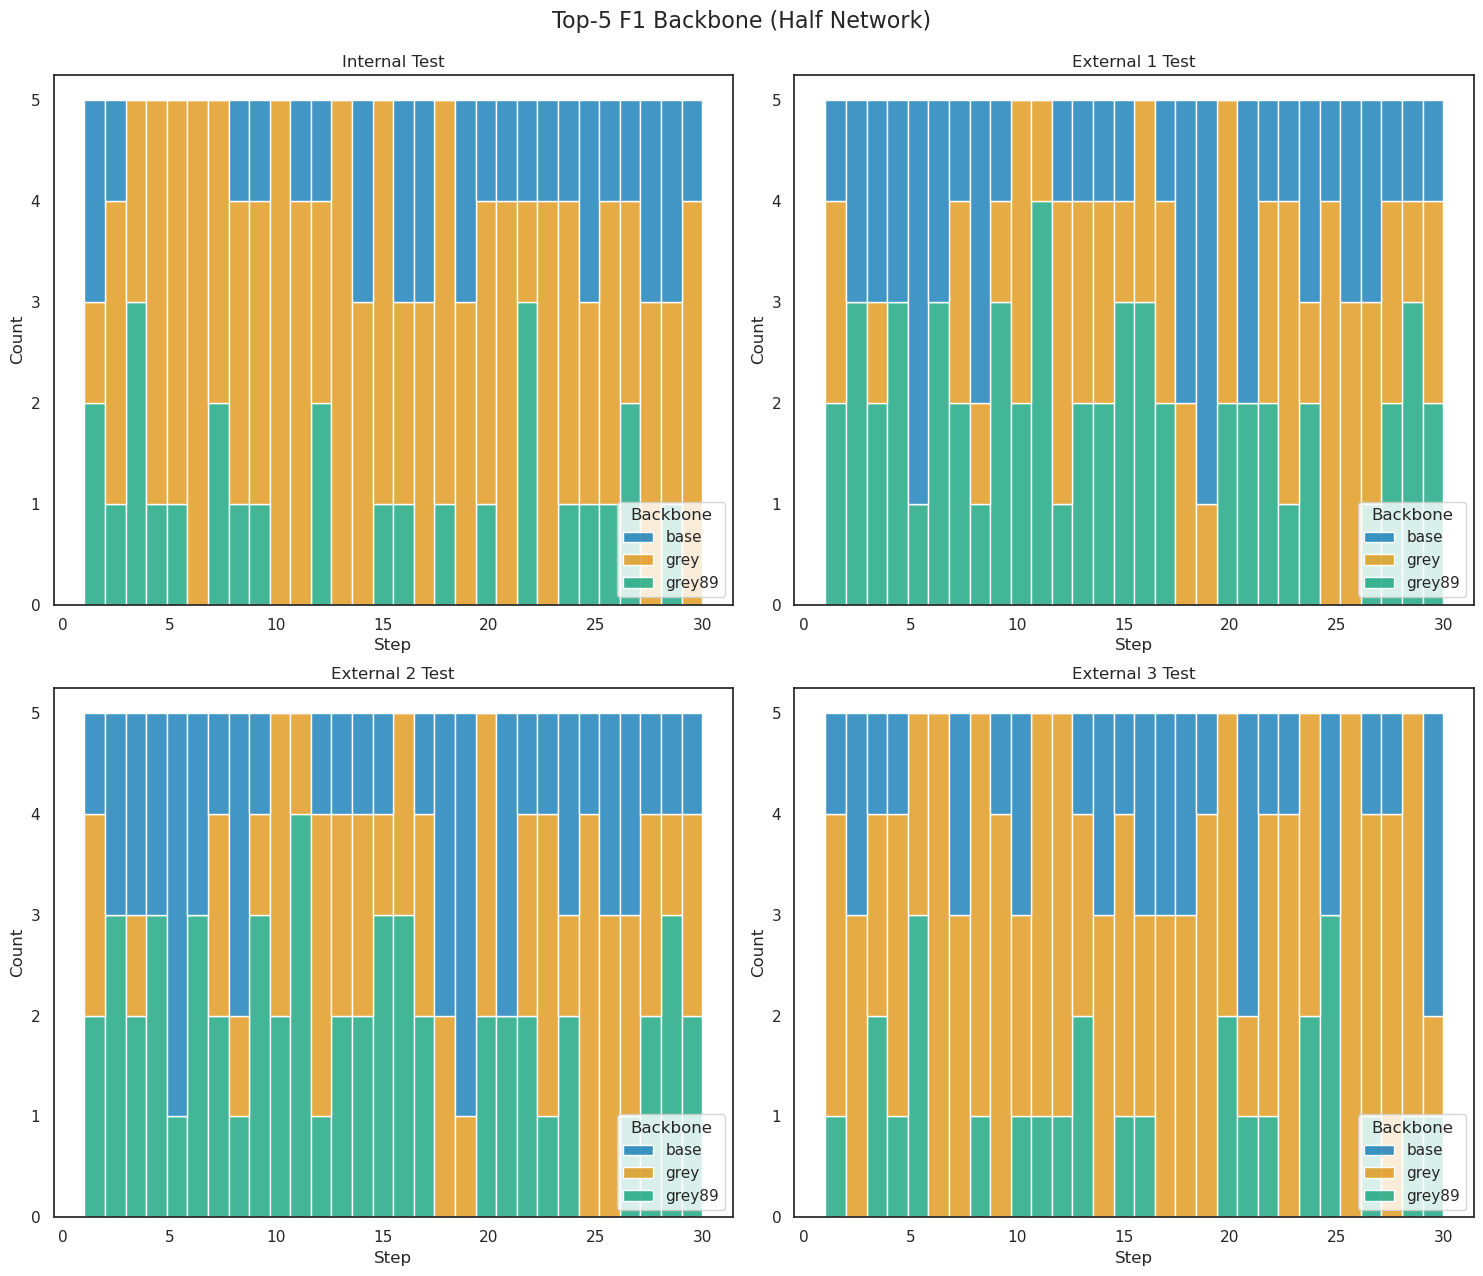

In [363]:
fig, axes = plt.subplots(2, 2,figsize=(15, 13))
plt.rc('legend', loc="lower right")

hue_ord = top5_f1_halfnet_test_df['Backbone'].unique()
sns.histplot(top5_f1_halfnet_test_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,0]).set(title='Internal Test')
sns.histplot(top5_f1_halfnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,1]).set(title='External 1 Test')
sns.histplot(top5_f1_halfnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,0]).set(title='External 2 Test')

sns.histplot(top5_f1_halfnet_ext3_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,1]).set(title='External 3 Test')
fig.tight_layout()
fig.suptitle("Top-5 F1 Backbone (Half Network)", size=16)
fig.subplots_adjust(top=0.93)

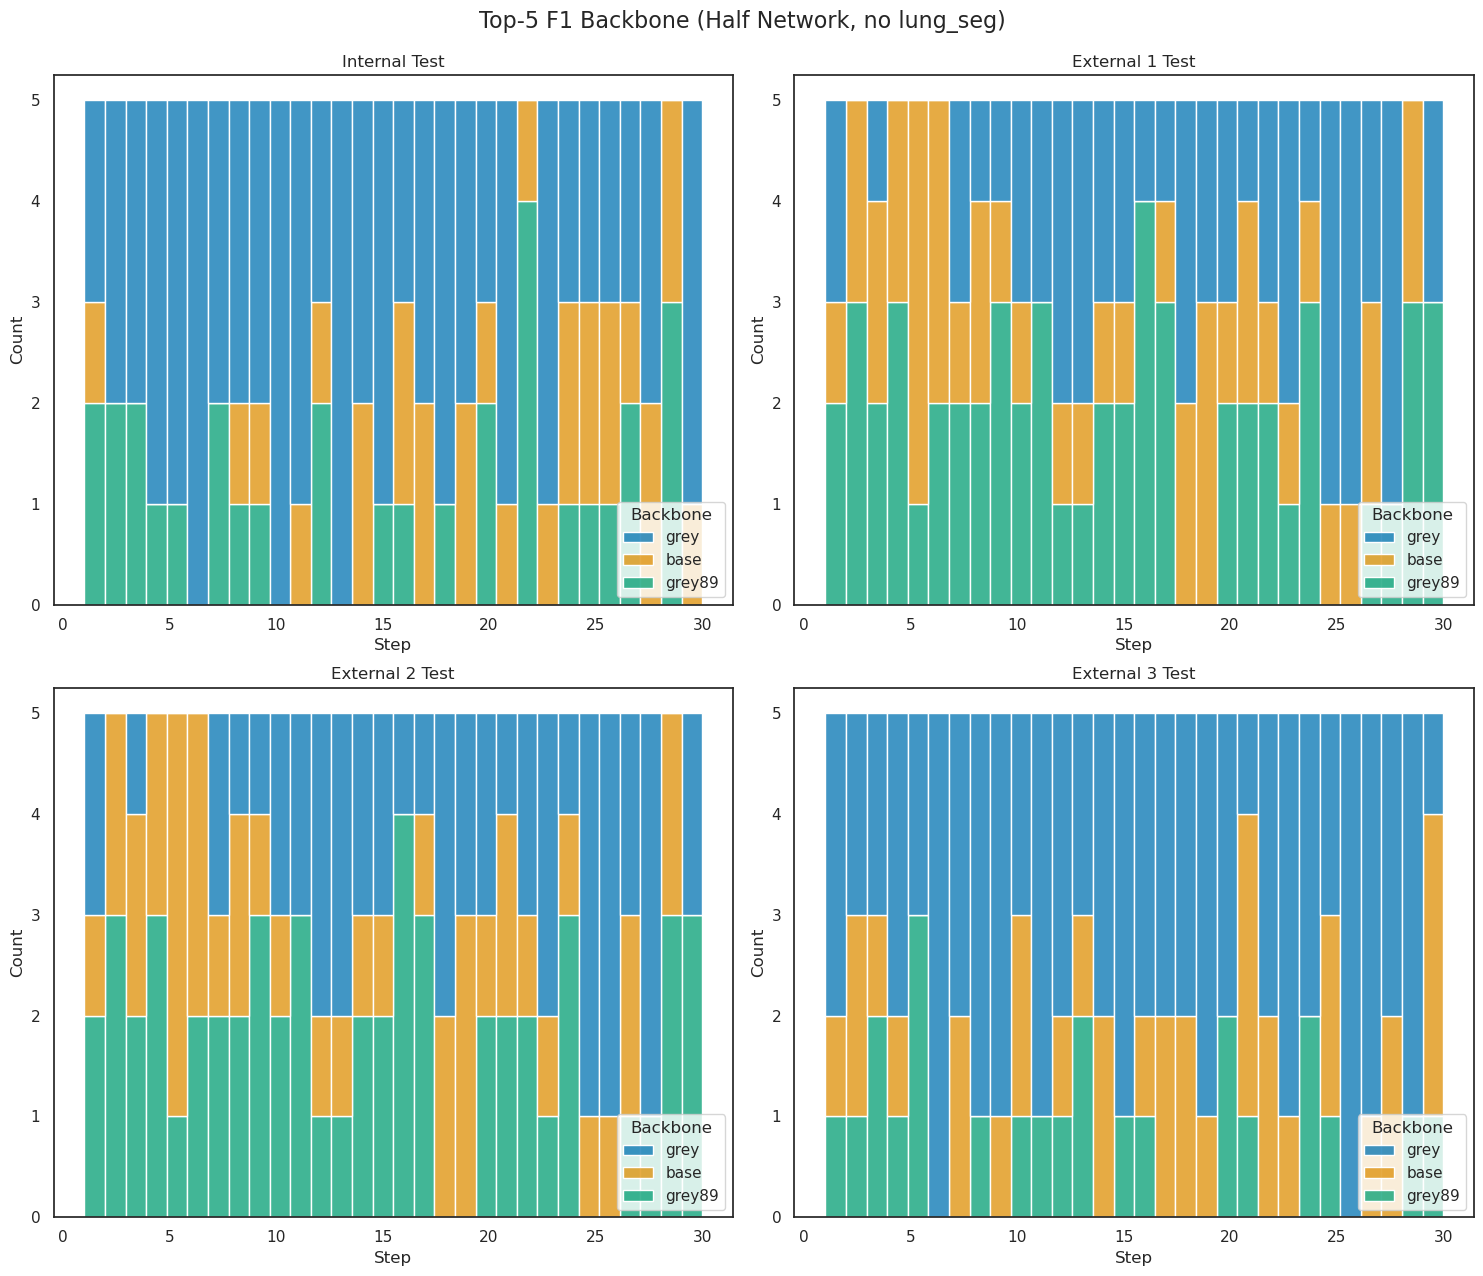

In [382]:
fig, axes = plt.subplots(2, 2,figsize=(15, 13))
plt.rc('legend', loc="lower right")

hue_ord = top5_f1_halfnet_test_df['Backbone'].unique()
sns.histplot(top5_f1_halfnet_test_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,0]).set(title='Internal Test')
sns.histplot(top5_f1_halfnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,1]).set(title='External 1 Test')
sns.histplot(top5_f1_halfnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,0]).set(title='External 2 Test')

sns.histplot(top5_f1_halfnet_ext3_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,1]).set(title='External 3 Test')
fig.tight_layout()
fig.suptitle("Top-5 F1 Backbone (Half Network, no lung_seg)", size=16)
fig.subplots_adjust(top=0.93)

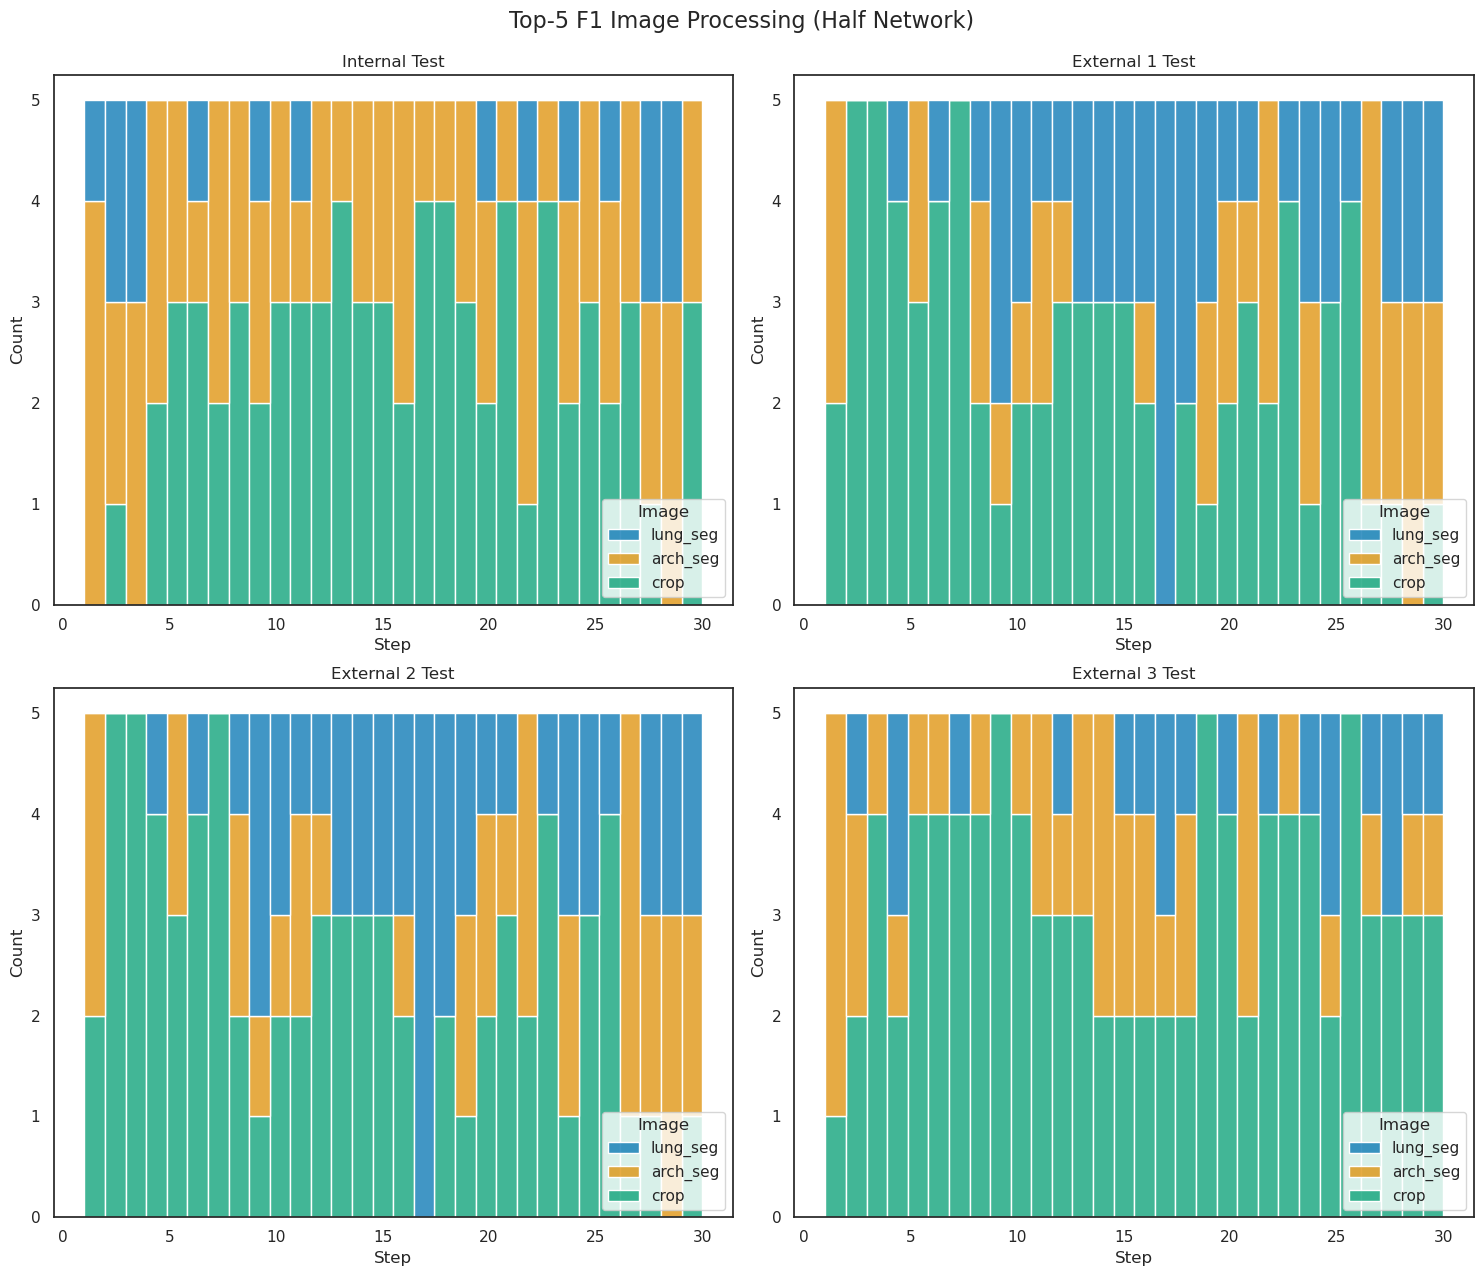

In [349]:
fig, axes = plt.subplots(2, 2,figsize=(15, 13))
plt.rc('legend', loc="lower right")

hue_ord = top5_f1_halfnet_test_df['Image'].unique()
sns.histplot(top5_f1_halfnet_test_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,0]).set(title='Internal Test')
sns.histplot(top5_f1_halfnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,1]).set(title='External 1 Test')
sns.histplot(top5_f1_halfnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,0]).set(title='External 2 Test')

sns.histplot(top5_f1_halfnet_ext3_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,1]).set(title='External 3 Test')
fig.tight_layout()
fig.suptitle("Top-5 F1 Image Processing (Half Network)", size=16)
fig.subplots_adjust(top=0.93)

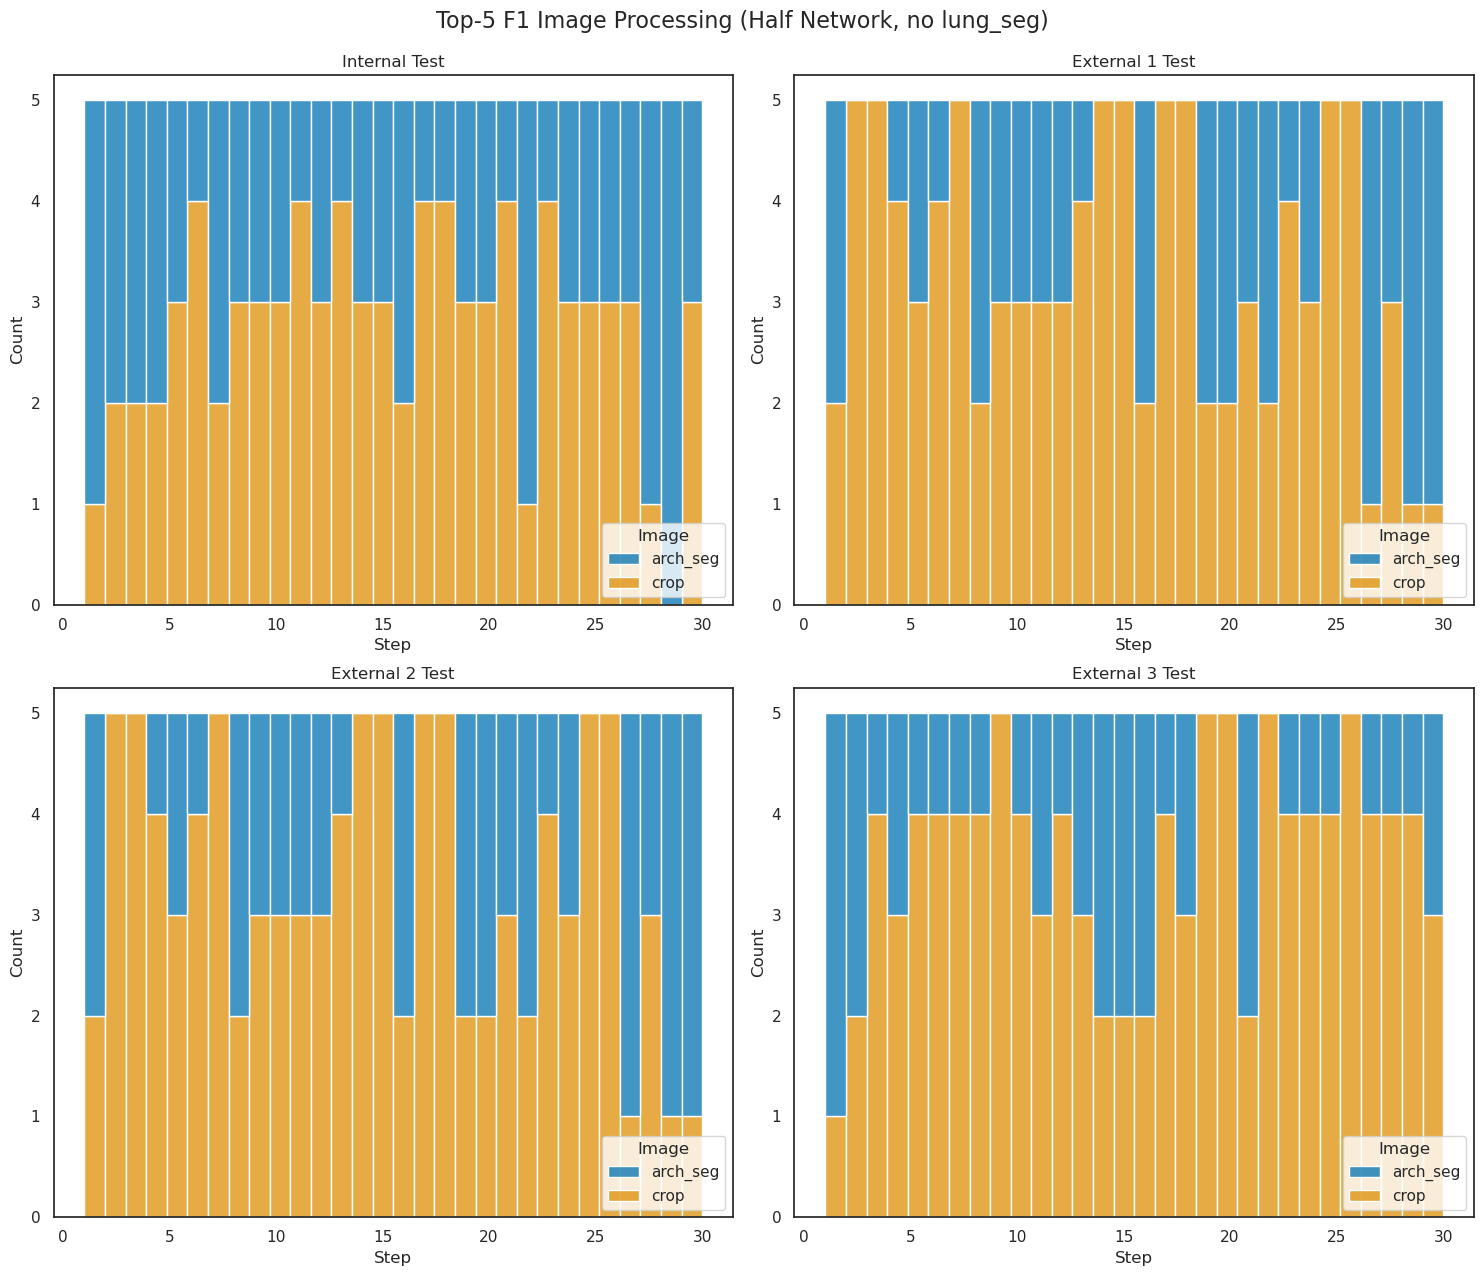

In [383]:
fig, axes = plt.subplots(2, 2,figsize=(15, 13))
plt.rc('legend', loc="lower right")

hue_ord = top5_f1_halfnet_test_df['Image'].unique()
sns.histplot(top5_f1_halfnet_test_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,0]).set(title='Internal Test')
sns.histplot(top5_f1_halfnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,1]).set(title='External 1 Test')
sns.histplot(top5_f1_halfnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,0]).set(title='External 2 Test')

sns.histplot(top5_f1_halfnet_ext3_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,1]).set(title='External 3 Test')
fig.tight_layout()
fig.suptitle("Top-5 F1 Image Processing (Half Network, no lung_seg)", size=16)
fig.subplots_adjust(top=0.93)

##### Top-5 Full Network

In [377]:
# top5_f1_fullnet_test_df = top_f1_df[top_f1_df['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext1_df = top_f1_df[top_f1_df['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext2_df = top_f1_df[top_f1_df['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext3_df = top_f1_df[top_f1_df['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()

# top5_f1_halfnet_test_df = top_f1_df[top_f1_df['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext1_df = top_f1_df[top_f1_df['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext2_df = top_f1_df[top_f1_df['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext3_df = top_f1_df[top_f1_df['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()

# top5_f1_fullnet_test_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext1_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext2_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
# top5_f1_fullnet_ext3_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()

# top5_f1_halfnet_test_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext1_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext2_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
# top5_f1_halfnet_ext3_df = top_f1_df_nogrey[top_f1_df_nogrey['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()

top5_f1_fullnet_test_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
top5_f1_fullnet_ext1_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
top5_f1_fullnet_ext2_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
top5_f1_fullnet_ext3_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()

top5_f1_halfnet_test_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
top5_f1_halfnet_ext1_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext1'])).reset_index(drop=True).copy()
top5_f1_halfnet_ext2_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext2'])).reset_index(drop=True).copy()
top5_f1_halfnet_ext3_df = top_f1_df_nolung[top_f1_df_nolung['Training']=="half_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Ext3'])).reset_index(drop=True).copy()


/tmp/ipykernel_451531/3322189855.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_f1_fullnet_test_df = top_f1_df[top_f1_df['Training']=="full_network"].groupby(['Step']).apply(lambda x: x.nlargest(5,['F1/Test'])).reset_index(drop=True).copy()
/tmp/ipykernel_451531/3322189855.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_f1_fullnet_ext1_df = top_f1_df[top_f1_df['Training']=="full_network"]

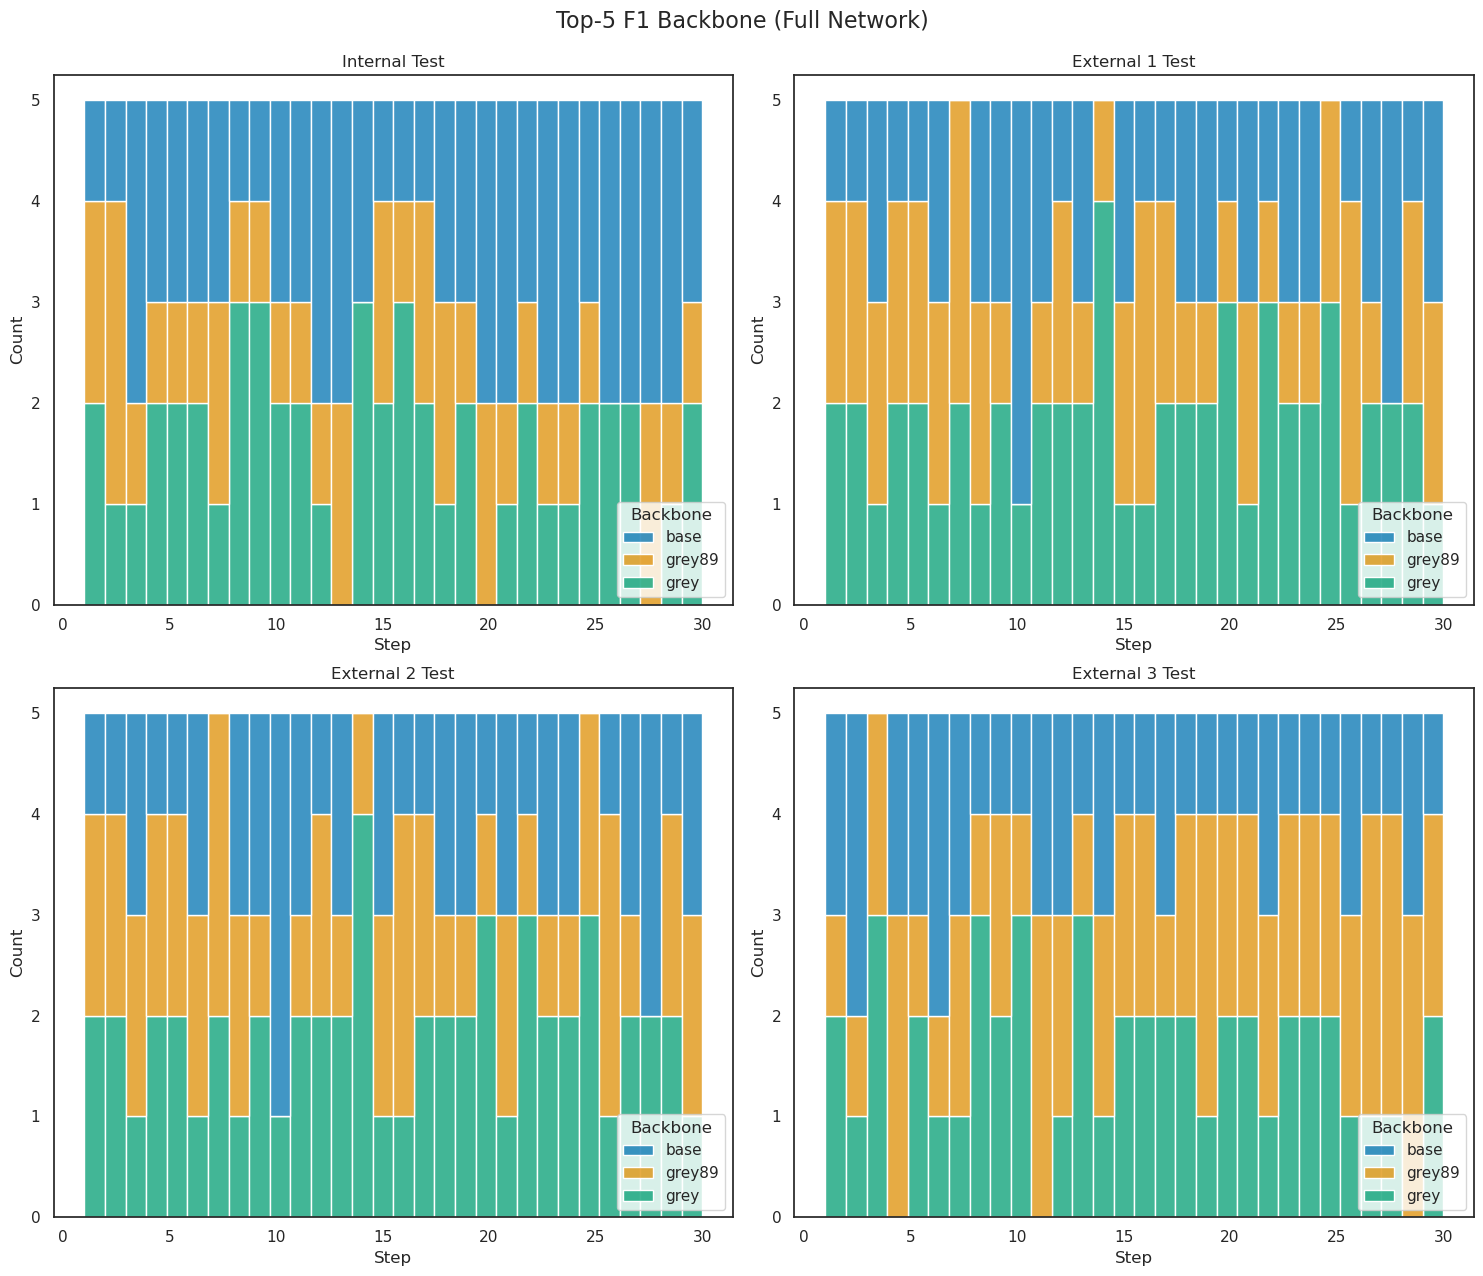

In [379]:
fig, axes = plt.subplots(2, 2,figsize=(15, 13))
plt.rc('legend', loc="lower right")
hue_ord = top5_f1_fullnet_test_df['Backbone'].unique()
sns.histplot(top5_f1_fullnet_test_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,0]).set(title='Internal Test')
sns.histplot(top5_f1_fullnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,1]).set(title='External 1 Test')
sns.histplot(top5_f1_fullnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,0]).set(title='External 2 Test')

sns.histplot(top5_f1_fullnet_ext3_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,1]).set(title='External 3 Test')
fig.tight_layout()
fig.suptitle("Top-5 F1 Backbone (Full Network)", size=16)
fig.subplots_adjust(top=0.93)

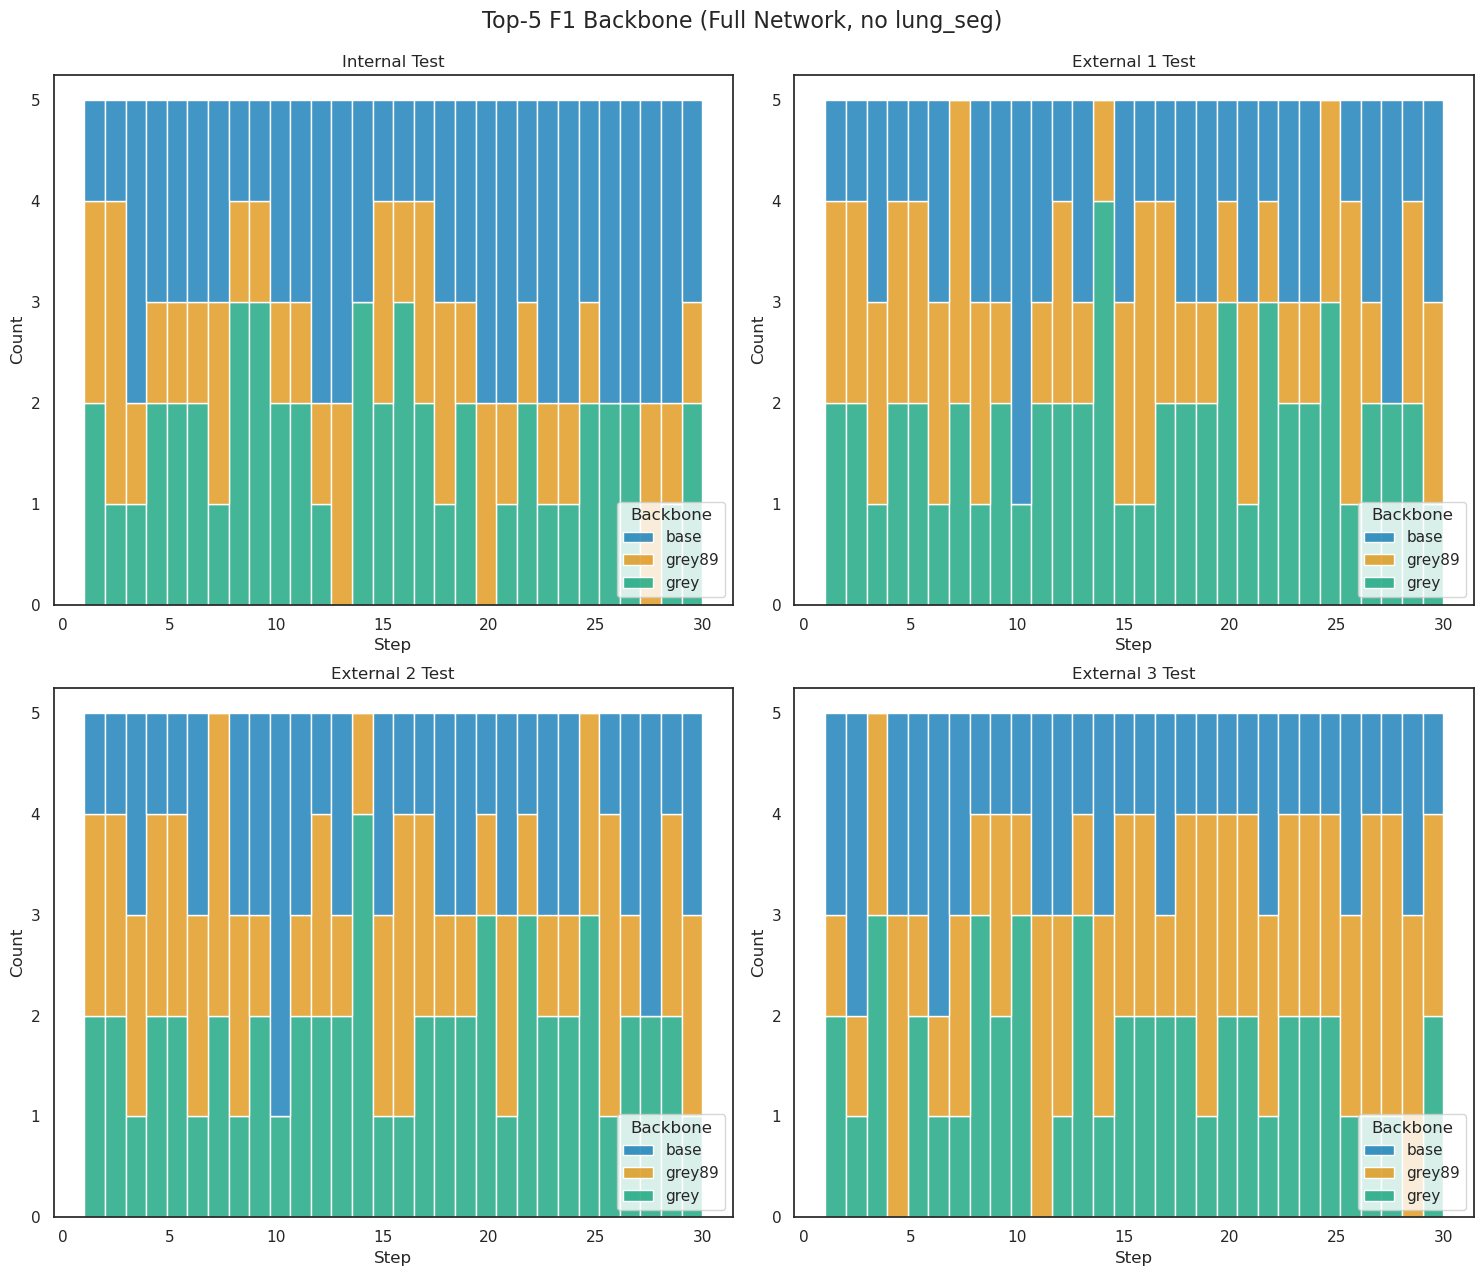

In [384]:
fig, axes = plt.subplots(2, 2,figsize=(15, 13))
plt.rc('legend', loc="lower right")
hue_ord = top5_f1_fullnet_test_df['Backbone'].unique()
sns.histplot(top5_f1_fullnet_test_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,0]).set(title='Internal Test')
sns.histplot(top5_f1_fullnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,1]).set(title='External 1 Test')
sns.histplot(top5_f1_fullnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,0]).set(title='External 2 Test')

sns.histplot(top5_f1_fullnet_ext3_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,1]).set(title='External 3 Test')
fig.tight_layout()
fig.suptitle("Top-5 F1 Backbone (Full Network, no lung_seg)", size=16)
fig.subplots_adjust(top=0.93)

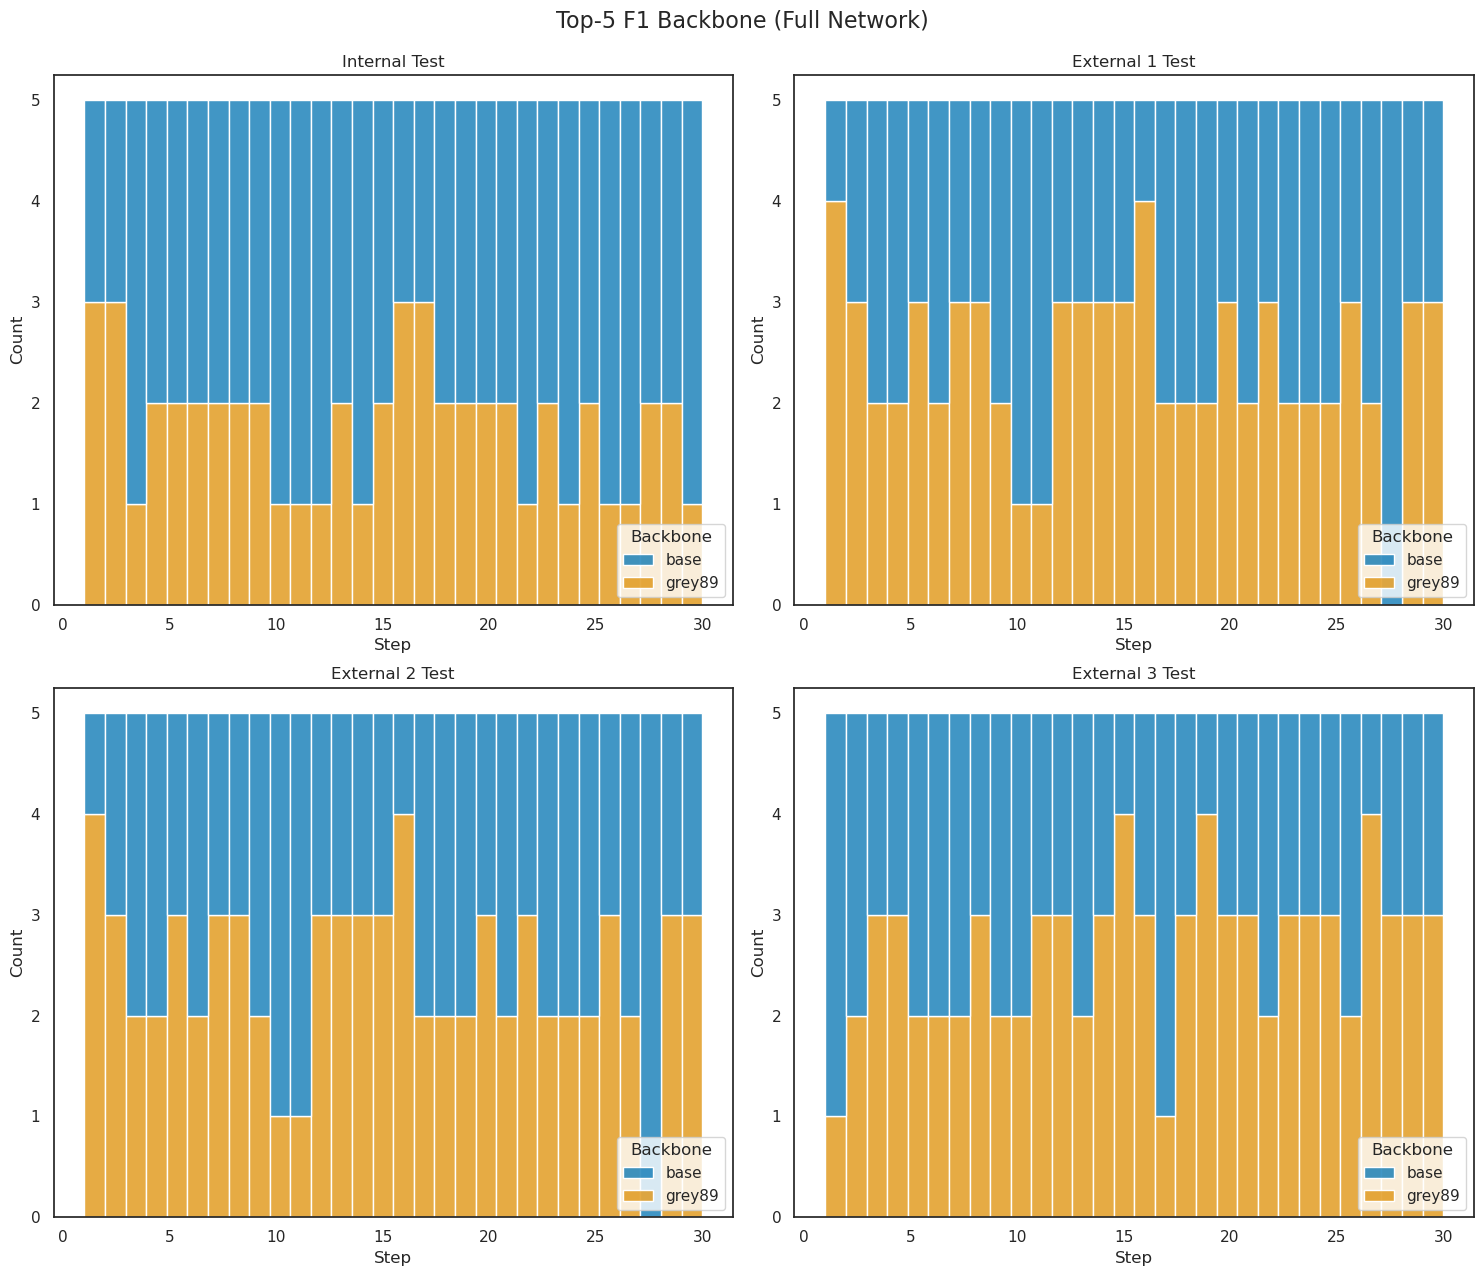

In [376]:
fig, axes = plt.subplots(2, 2,figsize=(15, 13))
plt.rc('legend', loc="lower right")
hue_ord = top5_f1_fullnet_test_df['Backbone'].unique()
sns.histplot(top5_f1_fullnet_test_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,0]).set(title='Internal Test')
sns.histplot(top5_f1_fullnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,1]).set(title='External 1 Test')
sns.histplot(top5_f1_fullnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,0]).set(title='External 2 Test')

sns.histplot(top5_f1_fullnet_ext3_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", 
            hue="Backbone",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,1]).set(title='External 3 Test')
fig.tight_layout()
fig.suptitle("Top-5 F1 Backbone (Full Network)", size=16)
fig.subplots_adjust(top=0.93)

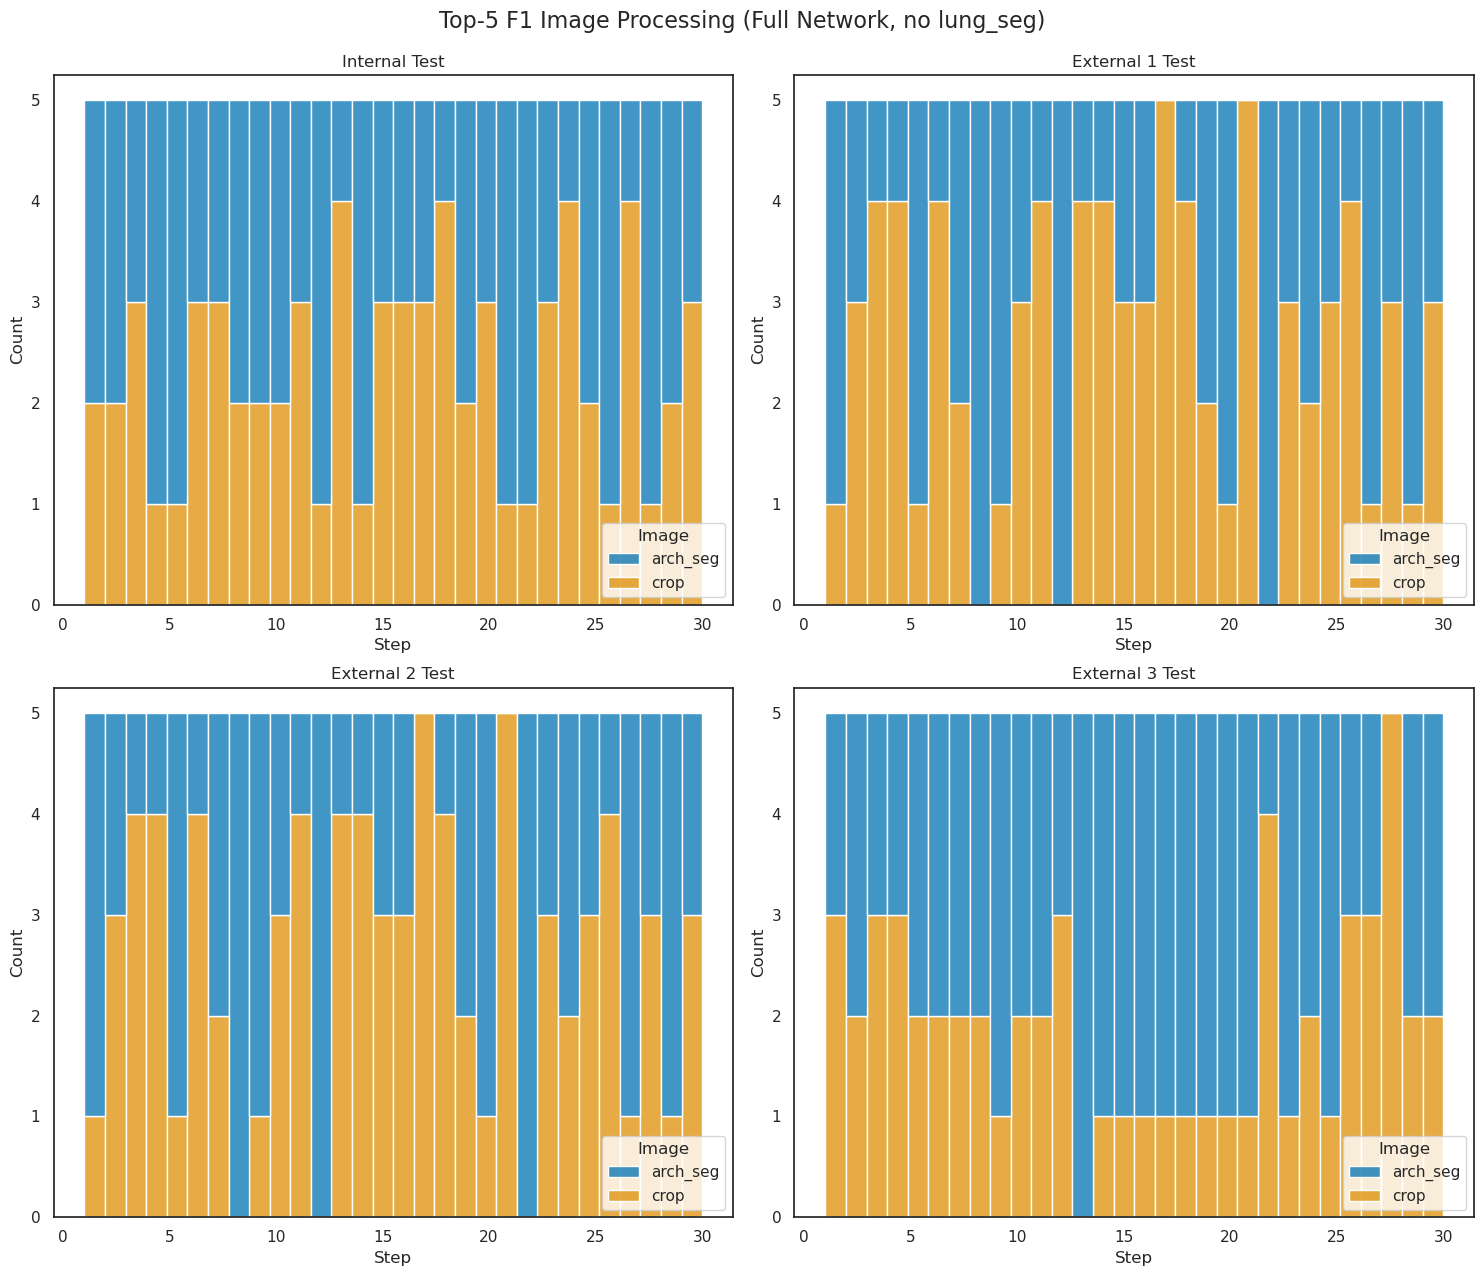

In [385]:
fig, axes = plt.subplots(2, 2,figsize=(15, 13))
plt.rc('legend', loc="lower right")

hue_ord = top5_f1_halfnet_test_df['Image'].unique()
sns.histplot(top5_f1_fullnet_test_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,0]).set(title='Internal Test')
sns.histplot(top5_f1_fullnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[0,1]).set(title='External 1 Test')
sns.histplot(top5_f1_fullnet_ext2_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,0]).set(title='External 2 Test')

sns.histplot(top5_f1_fullnet_ext3_df[['Step','F1/Ext3','Image','Training','Backbone']], x="Step", hue="Image",
            stat='count', #'count', 'density', 'percent', 'probability' or 'frequency'
            multiple='stack',
            bins=30,
            hue_order=hue_ord,
            ax=axes[1,1]).set(title='External 3 Test')
fig.tight_layout()
fig.suptitle("Top-5 F1 Image Processing (Full Network, no lung_seg)", size=16)
fig.subplots_adjust(top=0.93)

### F1 Scores

In [120]:
f1_df = pd.DataFrame()
for run_name in good_runs.log_paths:
    curr_run = EventAccumulator(path=os.path.join(runs_dir,run_name))
    curr_run.Reload()
    join_df = pd.DataFrame()
    join_df['Step'] = [i.step for i in curr_run.Scalars("F1/test")]
    join_df['F1/Test'] = [i.value for i in curr_run.Scalars("F1/test")]

    join_df['F1/Ext1'] = [i.value for i in curr_run.Scalars("F1/ext1")]
    join_df['F1/Ext2'] = [i.value for i in curr_run.Scalars("F1/ext2")]
    join_df['F1/Ext3'] = [i.value for i in curr_run.Scalars("F1/ext3")]
    
    join_df['Model'] = run_name.strip("224_runs/")
    join_df['Image'] = run_name.split("/")[1]
    join_df['Training'] = run_name.split("/")[2]
    join_df['Backbone'] = run_name.split("/")[3]
    join_df['LR'] = run_name.split("/")[4].split("_")[1]
    join_df['Batch'] = run_name.split("/")[4].split("_")[3]
    join_df['Mom'] = run_name.split("/")[4].split("_")[5]
    f1_df = pd.concat([f1_df,join_df])


In [150]:
f1_df.head()

,Step,F1/Test,F1/Ext1,F1/Ext2,F1/Ext3,Model,Image,Training,Backbone,LR,Batch,Mom
0,1,0.793023,0.896703,0.971963,0.549020,arch_seg/full_network/base/lr_0.0005_bsz_16_mo...,arch_seg,full_network,base,0.0005,16,0.95
1,2,0.794425,0.897914,0.962264,0.549020,arch_seg/full_network/base/lr_0.0005_bsz_16_mo...,arch_seg,full_network,base,0.0005,16,0.95
2,3,0.807468,0.889878,0.935185,0.540000,arch_seg/full_network/base/lr_0.0005_bsz_16_mo...,arch_seg,full_network,base,0.0005,16,0.95
3,4,0.800539,0.823828,0.871336,0.556701,arch_seg/full_network/base/lr_0.0005_bsz_16_mo...,arch_seg,full_network,base,0.0005,16,0.95
4,5,0.823096,0.900452,0.943571,0.545455,arch_seg/full_network/base/lr_0.0005_bsz_16_mo...,arch_seg,full_network,base,0.0005,16,0.95


In [170]:
sns.set_theme(style="white",
             palette="colorblind")

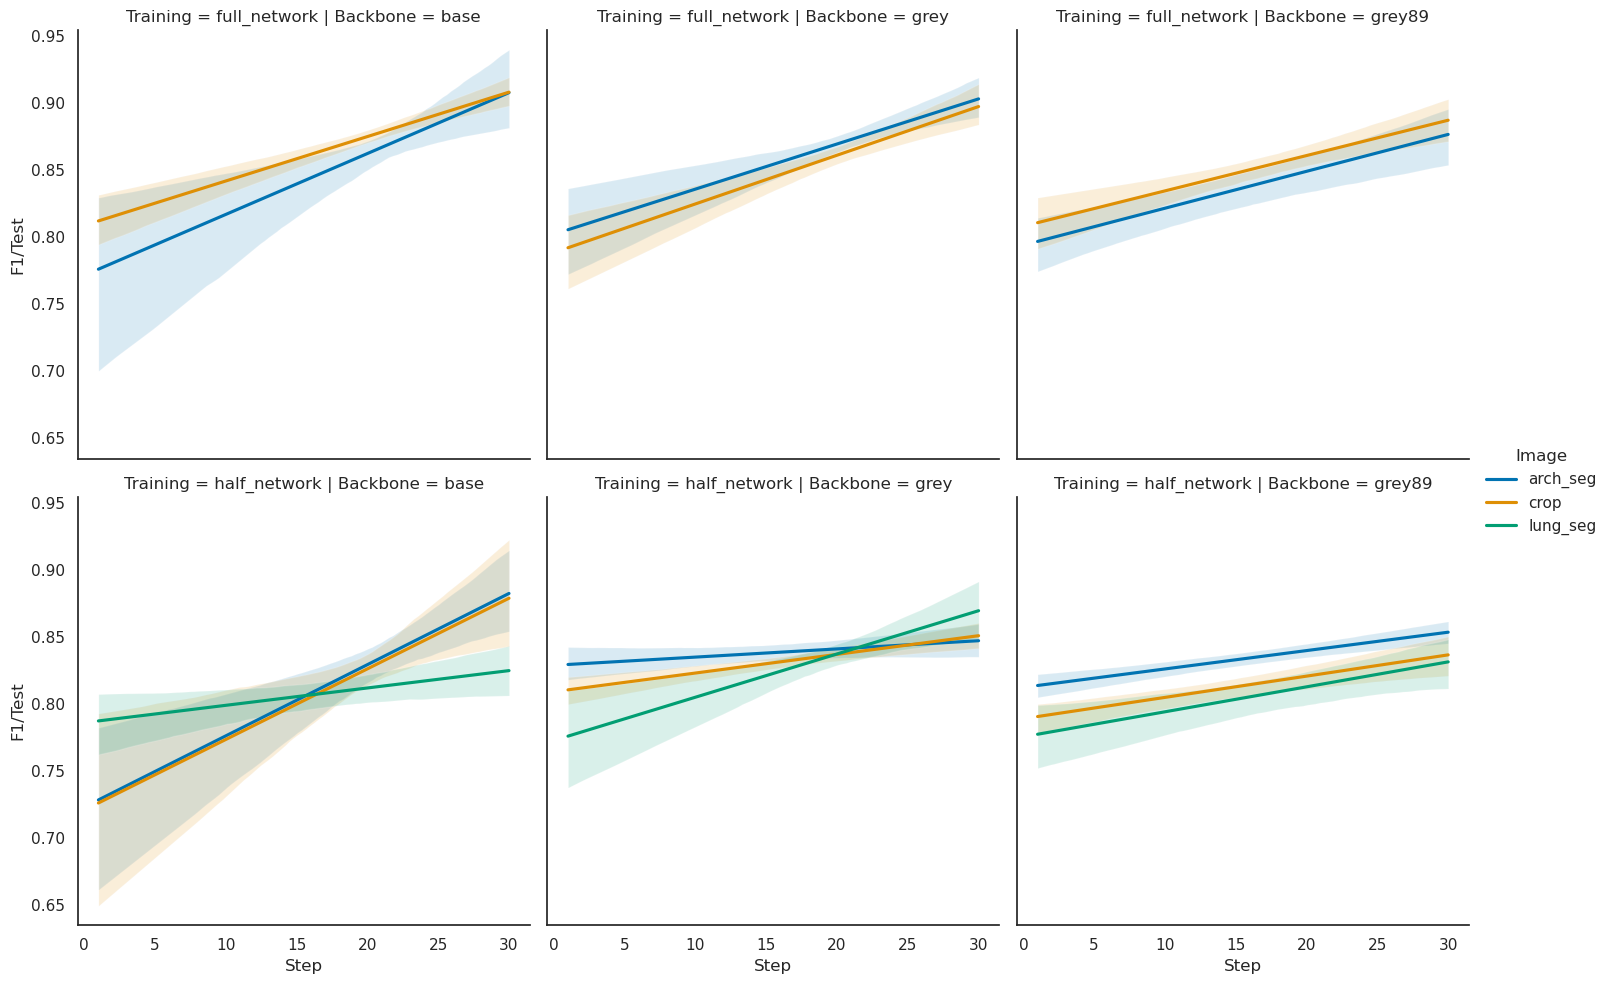

In [171]:
sns.lmplot(data=f1_df,
           x='Step',y='F1/Test',col="Backbone", row="Training", hue="Image",
           scatter=False,
          )

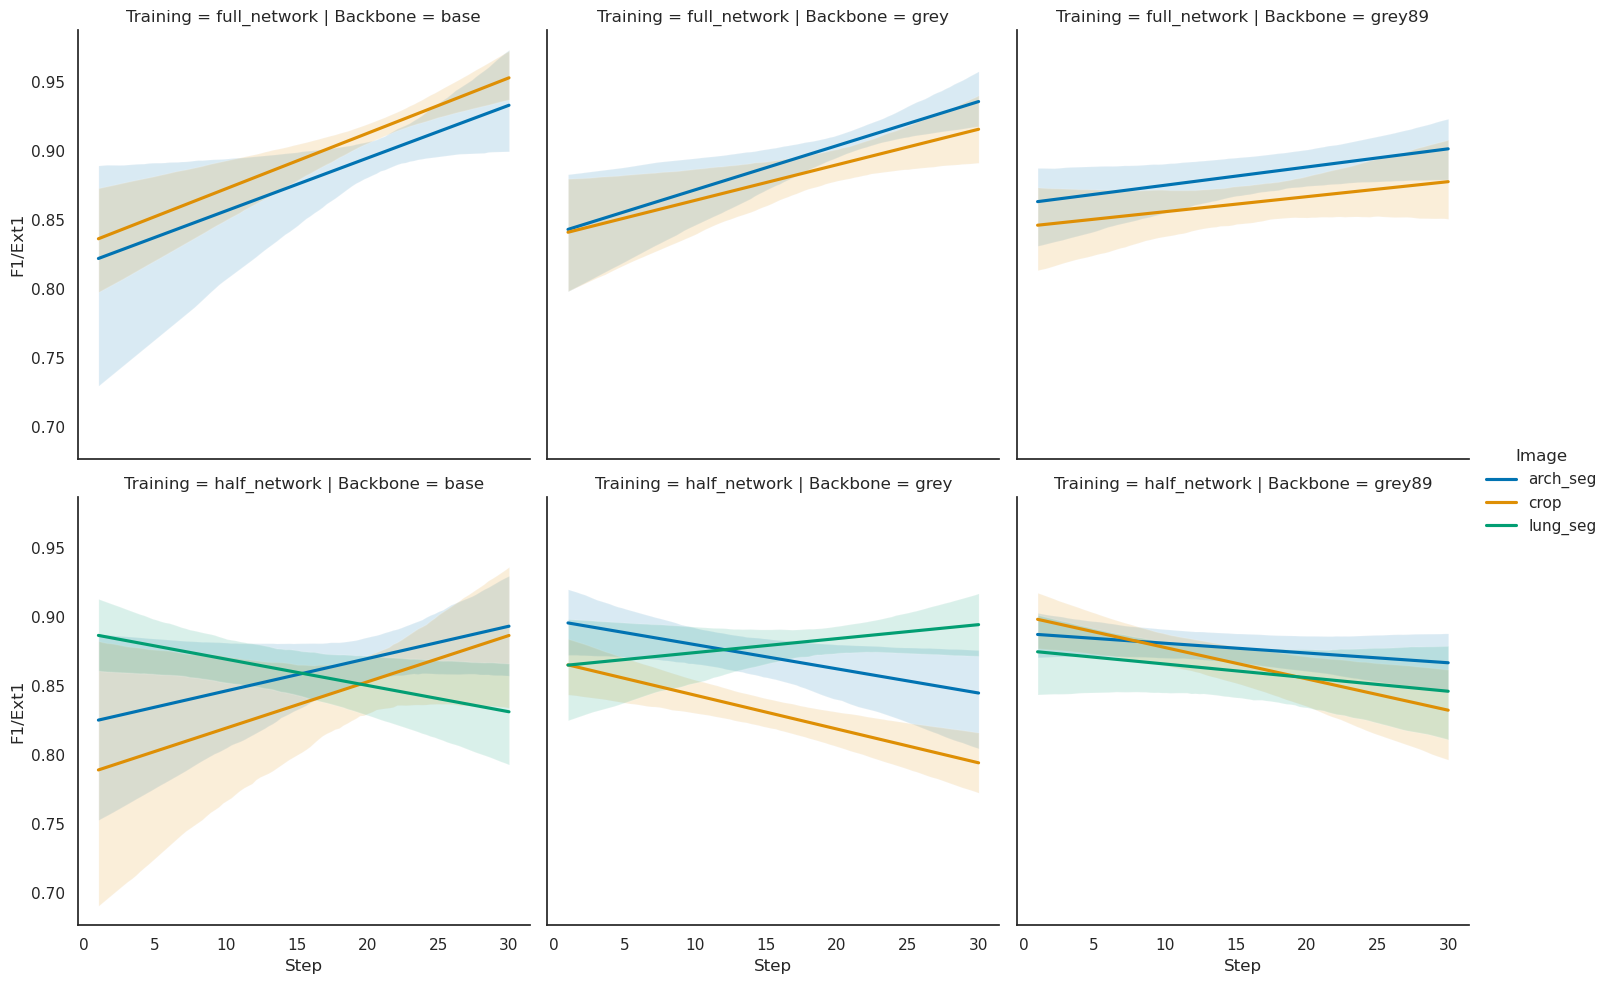

In [175]:
sns.lmplot(data=f1_df,
           x='Step',y='F1/Ext1',col="Backbone", row="Training", hue="Image",
           scatter=False
          )

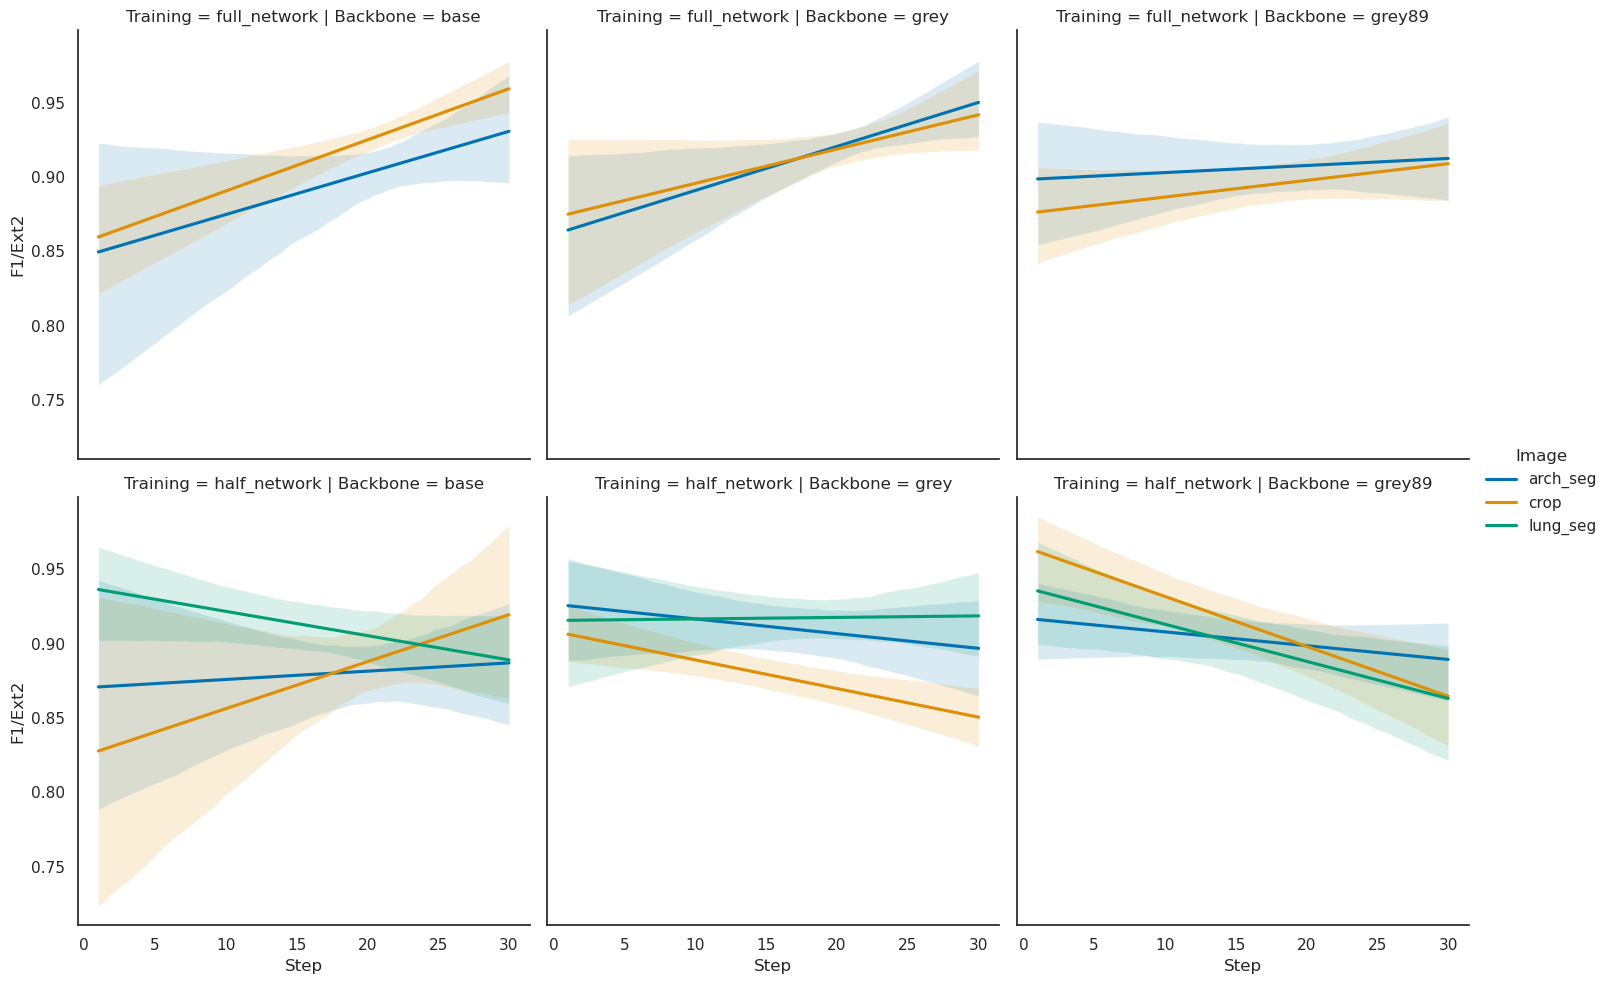

In [179]:
sns.lmplot(data=f1_df,
           x='Step',y='F1/Ext2',col="Backbone", row="Training", hue="Image",
           scatter=False
          )

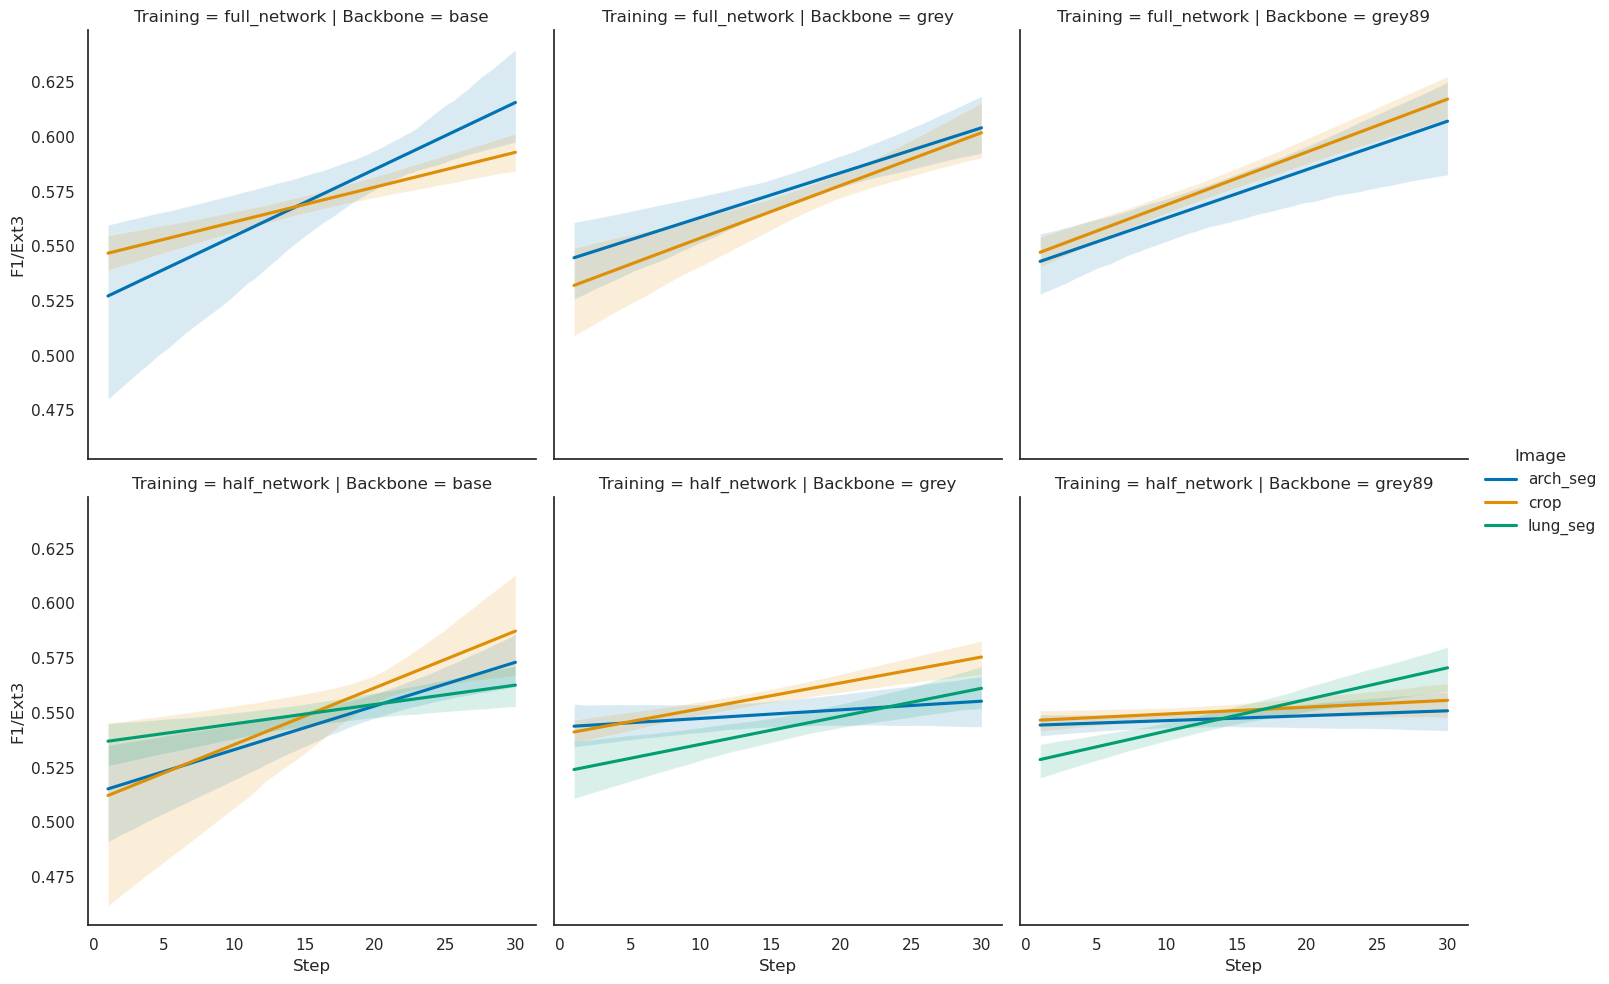

In [177]:
sns.lmplot(data=f1_df,
           x='Step',y='F1/Ext3',col="Backbone", row="Training", hue="Image",
           scatter=False
          )

### AUC Scores

In [149]:
auc_df = pd.DataFrame()
for run_name in good_runs.log_paths:
    curr_run = EventAccumulator(path=os.path.join(runs_dir,run_name))
    curr_run.Reload()
    join_df = pd.DataFrame()
    join_df['Step'] = [i.step for i in curr_run.Scalars("AUC/test")]
    join_df['AUC/Test'] = [i.value for i in curr_run.Scalars("AUC/test")]

    join_df['AUC/Ext1'] = [i.value for i in curr_run.Scalars("AUC/ext1")]
    join_df['AUC/Ext2'] = [i.value for i in curr_run.Scalars("AUC/ext2")]
    join_df['AUC/Ext3'] = [i.value for i in curr_run.Scalars("AUC/ext3")]
    
    join_df['Model'] = run_name.strip("224_runs/")
    join_df['Image'] = run_name.split("/")[1]
    join_df['Training'] = run_name.split("/")[2]
    join_df['Backbone'] = run_name.split("/")[3]
    join_df['LR'] = run_name.split("/")[4].split("_")[1]
    join_df['Batch'] = run_name.split("/")[4].split("_")[3]
    join_df['Mom'] = run_name.split("/")[4].split("_")[5]
    auc_df = pd.concat([auc_df,join_df])


In [151]:
auc_df.head()

,Step,AUC/Test,AUC/Ext1,AUC/Ext2,AUC/Ext3,Model,Image,Training,Backbone,LR,Batch,Mom
0,1,0.630215,0.610560,0.559169,0.368012,arch_seg/full_network/base/lr_0.0005_bsz_16_mo...,arch_seg,full_network,base,0.0005,16,0.95
1,2,0.640187,0.633861,0.512855,0.399845,arch_seg/full_network/base/lr_0.0005_bsz_16_mo...,arch_seg,full_network,base,0.0005,16,0.95
2,3,0.705191,0.552595,0.493648,0.447981,arch_seg/full_network/base/lr_0.0005_bsz_16_mo...,arch_seg,full_network,base,0.0005,16,0.95
3,4,0.738731,0.663700,0.605045,0.436335,arch_seg/full_network/base/lr_0.0005_bsz_16_mo...,arch_seg,full_network,base,0.0005,16,0.95
4,5,0.773156,0.746419,0.631865,0.395186,arch_seg/full_network/base/lr_0.0005_bsz_16_mo...,arch_seg,full_network,base,0.0005,16,0.95


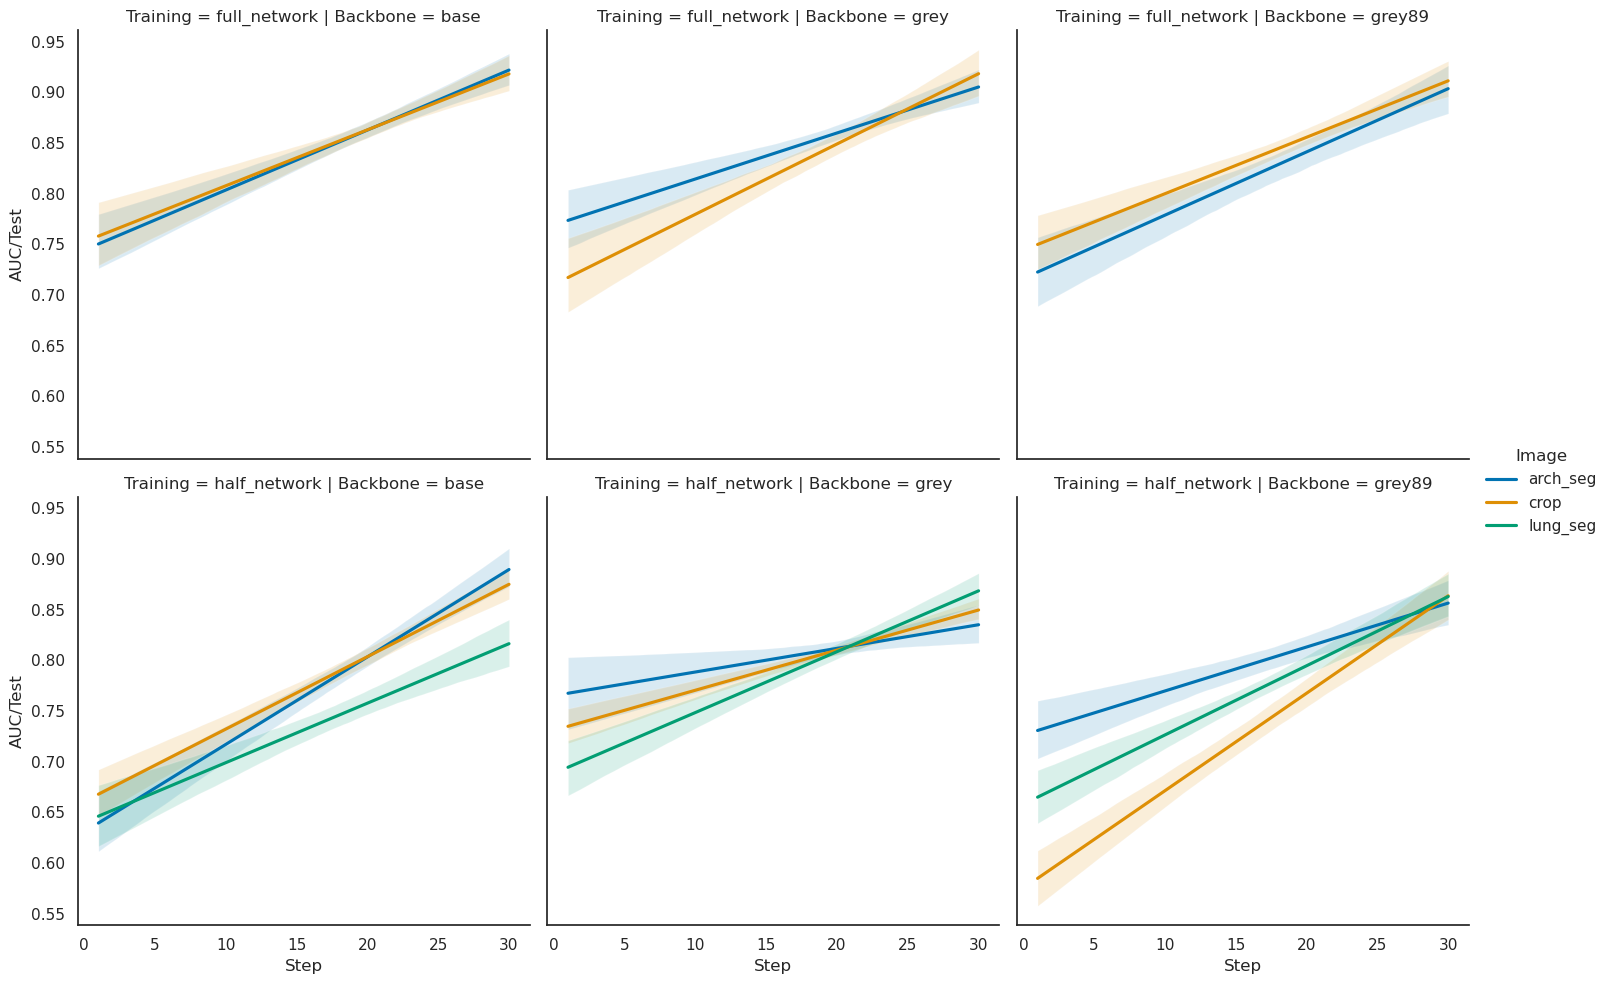

In [185]:
sns.lmplot(data=auc_df,
           x='Step',y='AUC/Test',col="Backbone", row="Training",hue="Image",
           scatter=False
          )

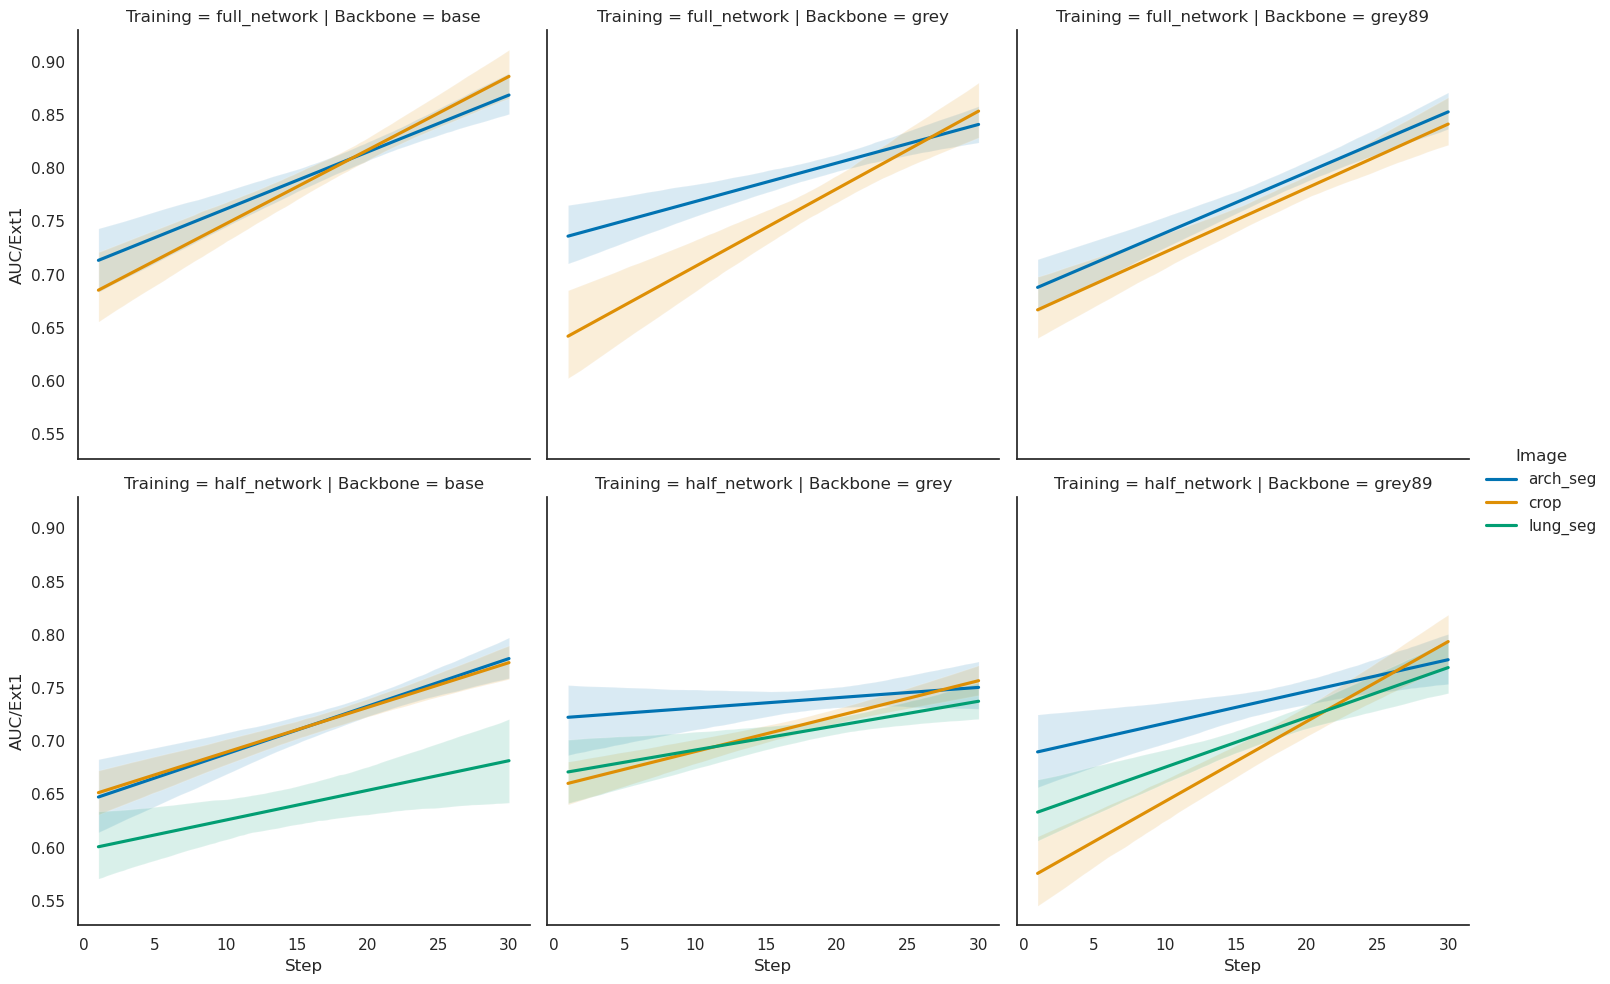

In [187]:
sns.lmplot(data=auc_df,
           x='Step',y='AUC/Ext1',col="Backbone", row="Training", hue="Image",
           scatter=False
          )

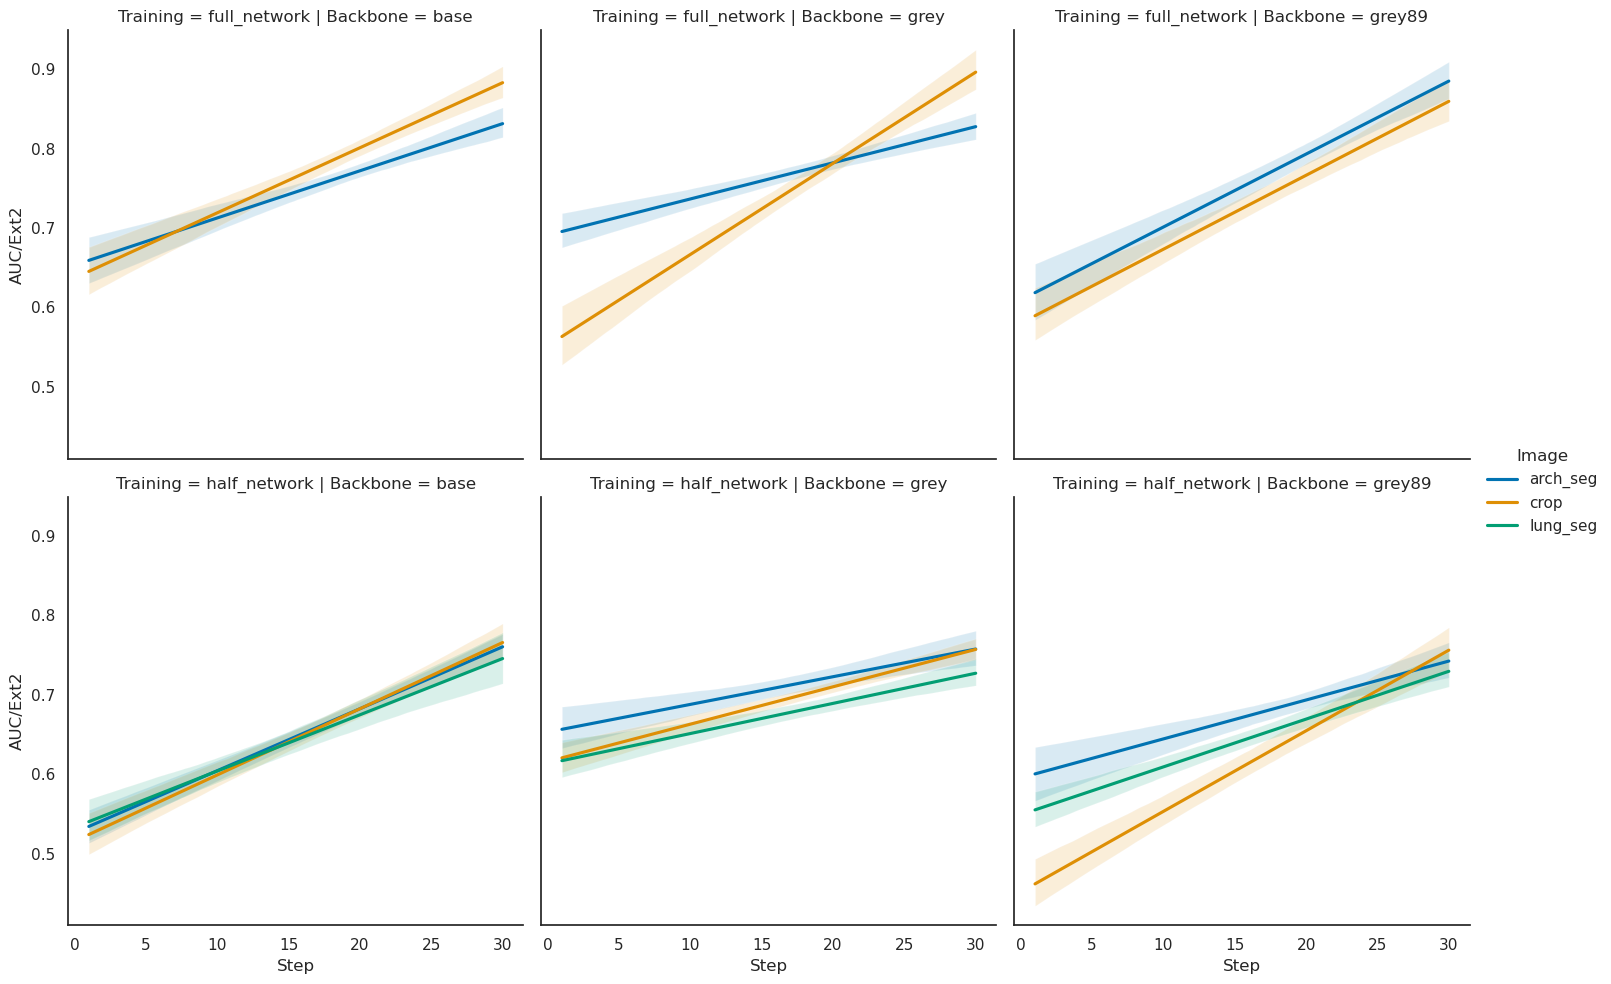

In [188]:
sns.lmplot(data=auc_df,
           x='Step',y='AUC/Ext2',col="Backbone", row="Training",hue="Image",
           scatter=False
          )

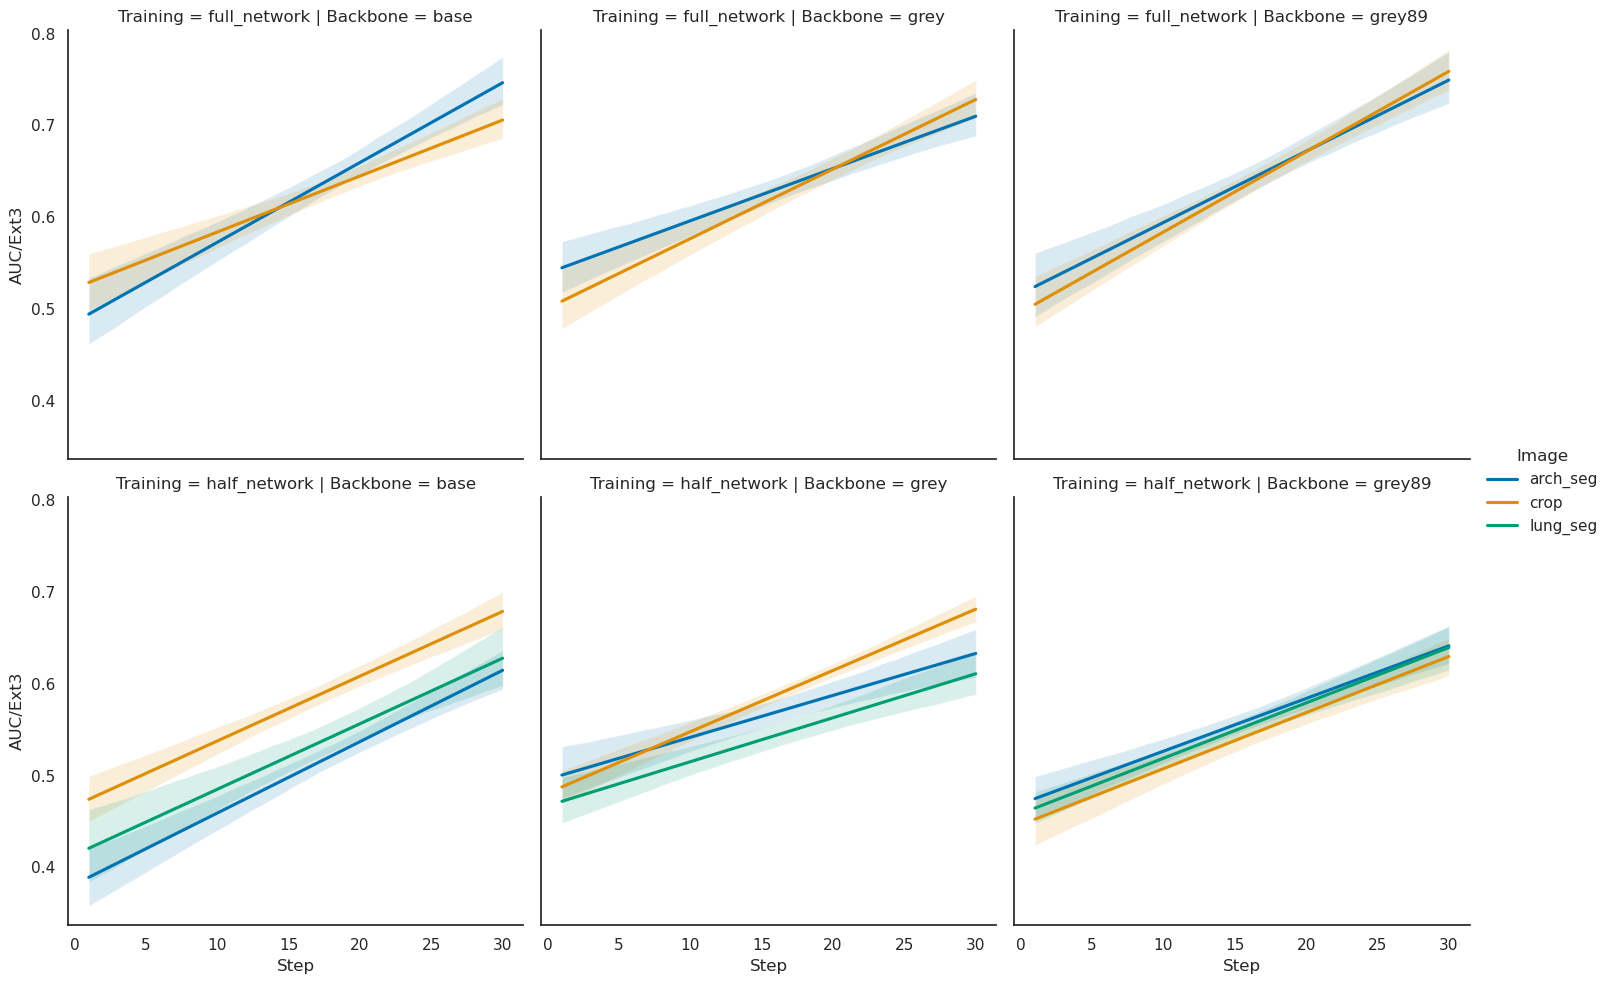

In [189]:
sns.lmplot(data=auc_df,
           x='Step',y='AUC/Ext3',col="Backbone",row="Training", hue="Image",
           scatter=False
          )

### Precision/Recall

In [264]:
pr_df = pd.DataFrame()
for run_name in good_runs.log_paths:
    curr_run = EventAccumulator(path=os.path.join(runs_dir,run_name))
    curr_run.Reload()
    join_df = pd.DataFrame()
    join_df['Step'] = [i.step for i in curr_run.Scalars("Precision/test")]
    join_df['Precision/Test'] = [i.value for i in curr_run.Scalars("Precision/test")]
    join_df['Recall/Test'] = [i.value for i in curr_run.Scalars("Recall/test")]

    join_df['Precision/Ext1'] = [i.value for i in curr_run.Scalars("Precision/ext1")]
    join_df['Precision/Ext2'] = [i.value for i in curr_run.Scalars("Precision/ext2")]
    join_df['Precision/Ext3'] = [i.value for i in curr_run.Scalars("Precision/ext3")]
        
    join_df['Recall/Ext1'] = [i.value for i in curr_run.Scalars("Recall/ext1")]
    join_df['Recall/Ext2'] = [i.value for i in curr_run.Scalars("Recall/ext2")]
    join_df['Recall/Ext3'] = [i.value for i in curr_run.Scalars("Recall/ext3")]
    
    join_df['Model'] = run_name.strip("224_runs/")
    join_df['Image'] = run_name.split("/")[1]
    join_df['Training'] = run_name.split("/")[2]
    join_df['Backbone'] = run_name.split("/")[3]
    join_df['LR'] = run_name.split("/")[4].split("_")[1]
    join_df['Batch'] = run_name.split("/")[4].split("_")[3]
    join_df['Mom'] = run_name.split("/")[4].split("_")[5]
    join_df['Subset'] = "-".join(run_name.split("/")[1:4])
    pr_df = pd.concat([pr_df,join_df])


In [268]:
pr_df[pr_df['Subset']==subset]

,Step,Precision/Test,Recall/Test,Precision/Ext1,Precision/Ext2,Precision/Ext3,Recall/Ext1,Recall/Ext2,Recall/Ext3,Model,Image,Training,Backbone,LR,Batch,Mom,Subset
0,1,0.736334,0.652422,0.872404,0.968037,0.387097,0.717073,0.769510,0.857143,lung_seg/half_network/grey89/lr_0.001_bsz_16_m...,lung_seg,half_network,grey89,0.001,16,0.99,lung_seg-half_network-grey89
1,2,0.669941,0.971510,0.815109,0.953833,0.375000,1.000000,0.993648,0.964286,lung_seg/half_network/grey89/lr_0.001_bsz_16_m...,lung_seg,half_network,grey89,0.001,16,0.99,lung_seg-half_network-grey89
2,3,0.731343,0.698006,0.843750,0.959135,0.392857,0.790244,0.724138,0.785714,lung_seg/half_network/grey89/lr_0.001_bsz_16_m...,lung_seg,half_network,grey89,0.001,16,0.99,lung_seg-half_network-grey89
3,4,0.683897,0.980057,0.818000,0.956140,0.378378,0.997561,0.989111,1.000000,lung_seg/half_network/grey89/lr_0.001_bsz_16_m...,lung_seg,half_network,grey89,0.001,16,0.99,lung_seg-half_network-grey89
4,5,0.728285,0.931624,0.841438,0.960748,0.362319,0.970732,0.932849,0.892857,lung_seg/half_network/grey89/lr_0.001_bsz_16_m...,lung_seg,half_network,grey89,0.001,16,0.99,lung_seg-half_network-grey89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,0.757991,0.945869,0.858696,0.964929,0.406250,0.963415,0.923775,0.928571,lung_seg/half_network/grey89/lr_0.01_bsz_16_mo...,lung_seg,half_network,grey89,0.01,16,0.95,lung_seg-half_network-grey89
26,27,0.882562,0.706553,0.910769,0.970724,0.478261,0.721951,0.571688,0.785714,lung_seg/half_network/grey89/lr_0.01_bsz_16_mo...,lung_seg,half_network,grey89,0.01,16,0.95,lung_seg-half_network-grey89
27,28,0.767816,0.951567,0.856540,0.966919,0.391304,0.990244,0.928312,0.964286,lung_seg/half_network/grey89/lr_0.01_bsz_16_mo...,lung_seg,half_network,grey89,0.01,16,0.95,lung_seg-half_network-grey89
28,29,0.736842,0.957265,0.846154,0.967105,0.405797,0.992683,0.933757,1.000000,lung_seg/half_network/grey89/lr_0.01_bsz_16_mo...,lung_seg,half_network,grey89,0.01,16,0.95,lung_seg-half_network-grey89


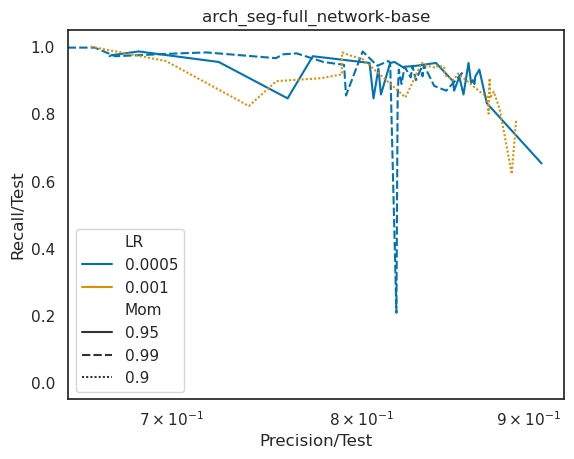

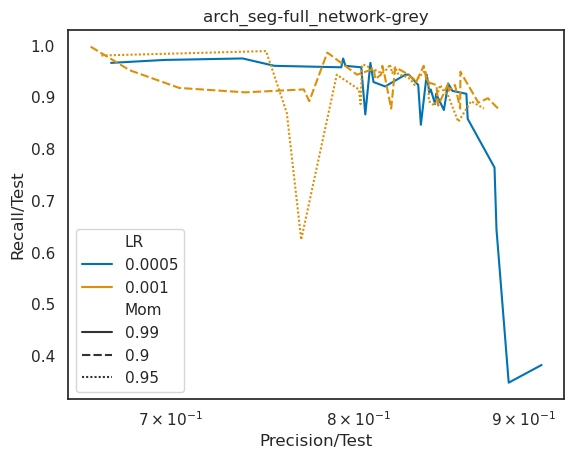

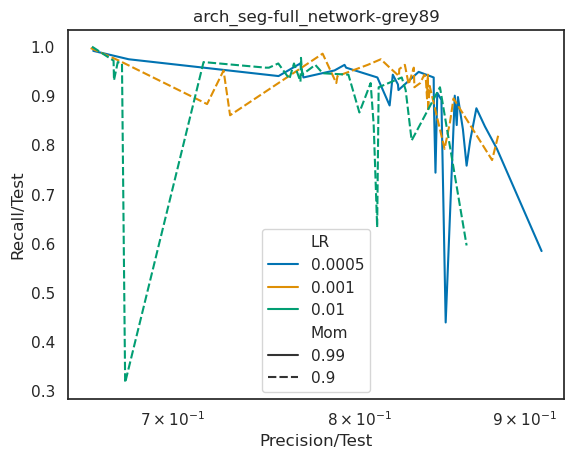

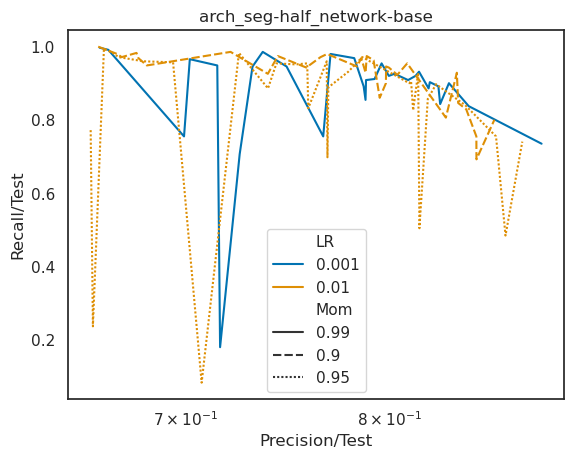

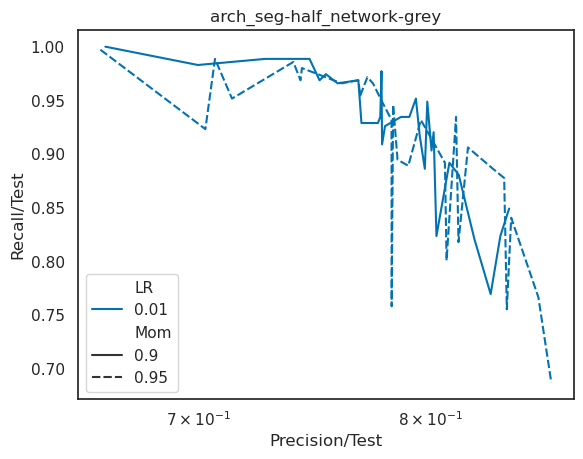

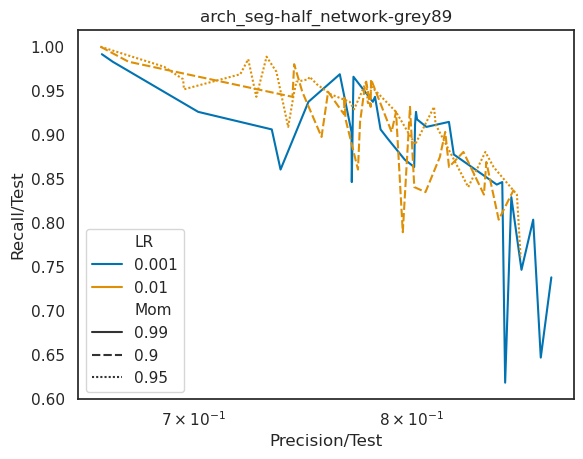

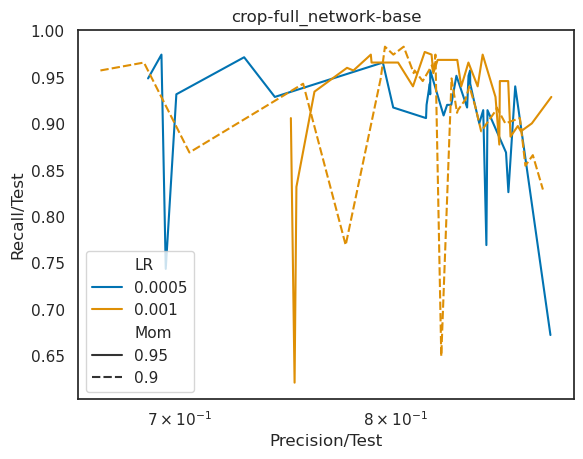

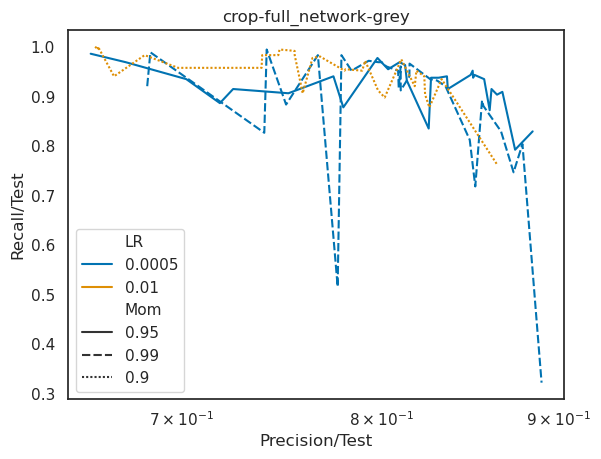

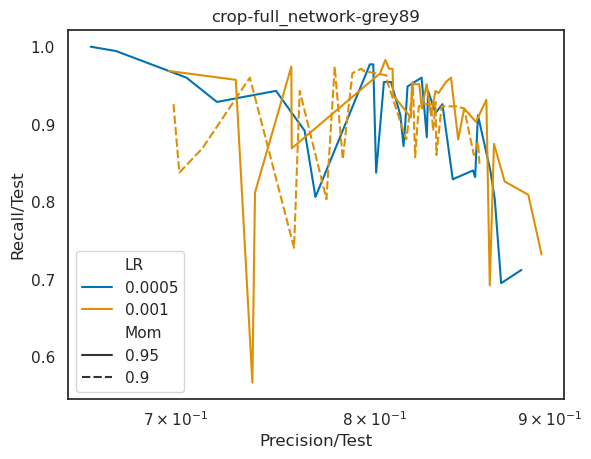

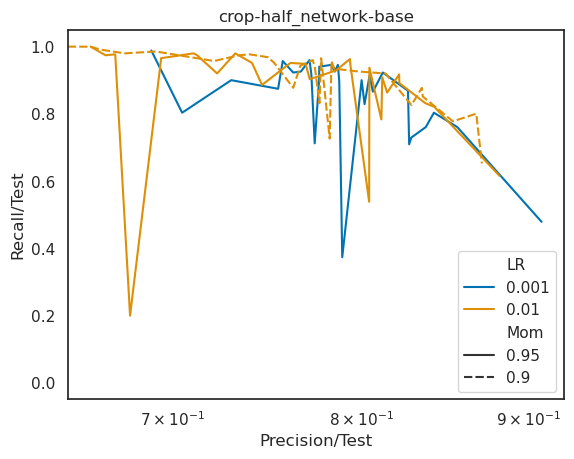

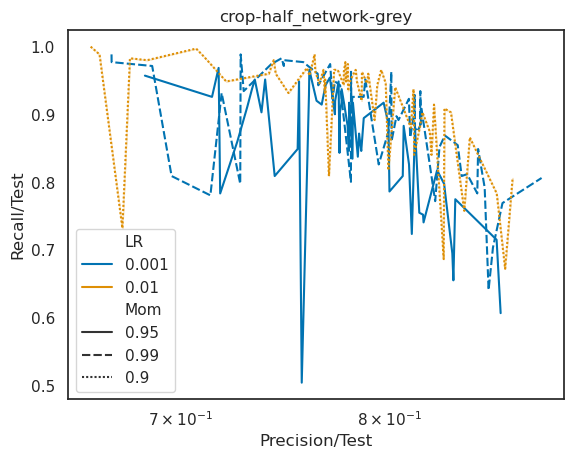

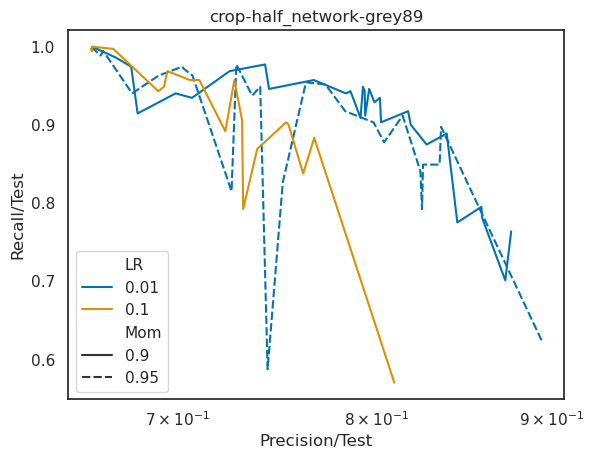

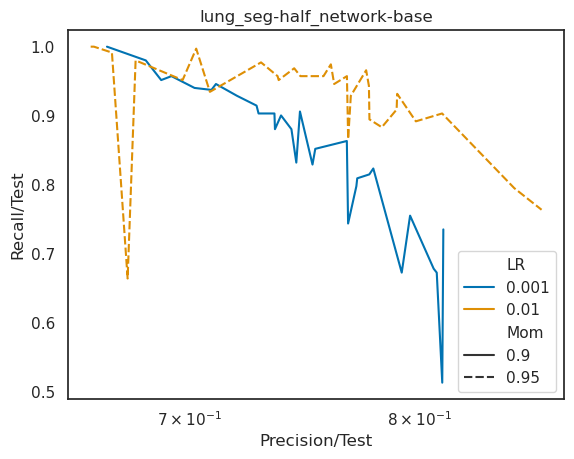

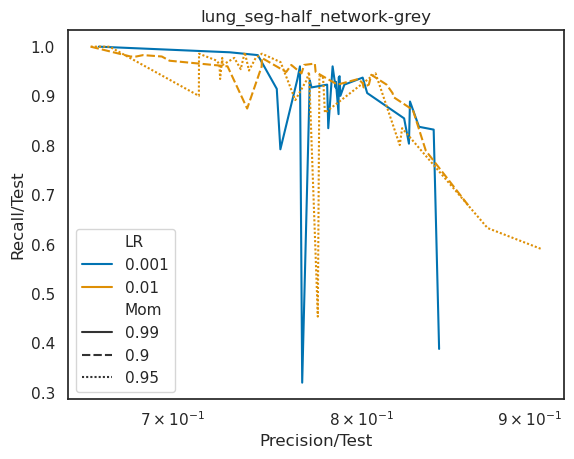

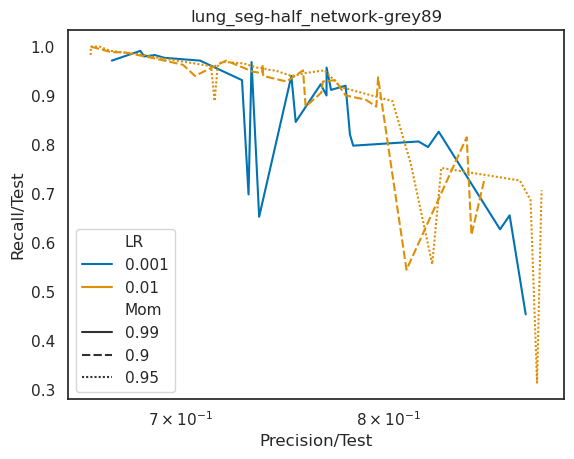

In [273]:
for subset in pr_df['Subset'].unique():
    fig, ax = plt.subplots()
    ax.set(xscale="log")
    sns.lineplot(data=pr_df[pr_df['Subset']==subset],
               x='Precision/Test',y='Recall/Test',
                 hue="LR",
                 style="Mom",
                 # ax = ax
              )
    plt.title("{}".format(subset))
    plt.show()